## Clustering y reducción de dimencionalidad

### Importación de los datos

Importación de los datos y librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import linear_model
from numpy import genfromtxt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from validclust import dunn
from sklearn.metrics import pairwise_distances

X = pd.read_csv('OutTest.csv', header = 0)
data_frame = X

## Estudio de los datos

### Distribución de los datos

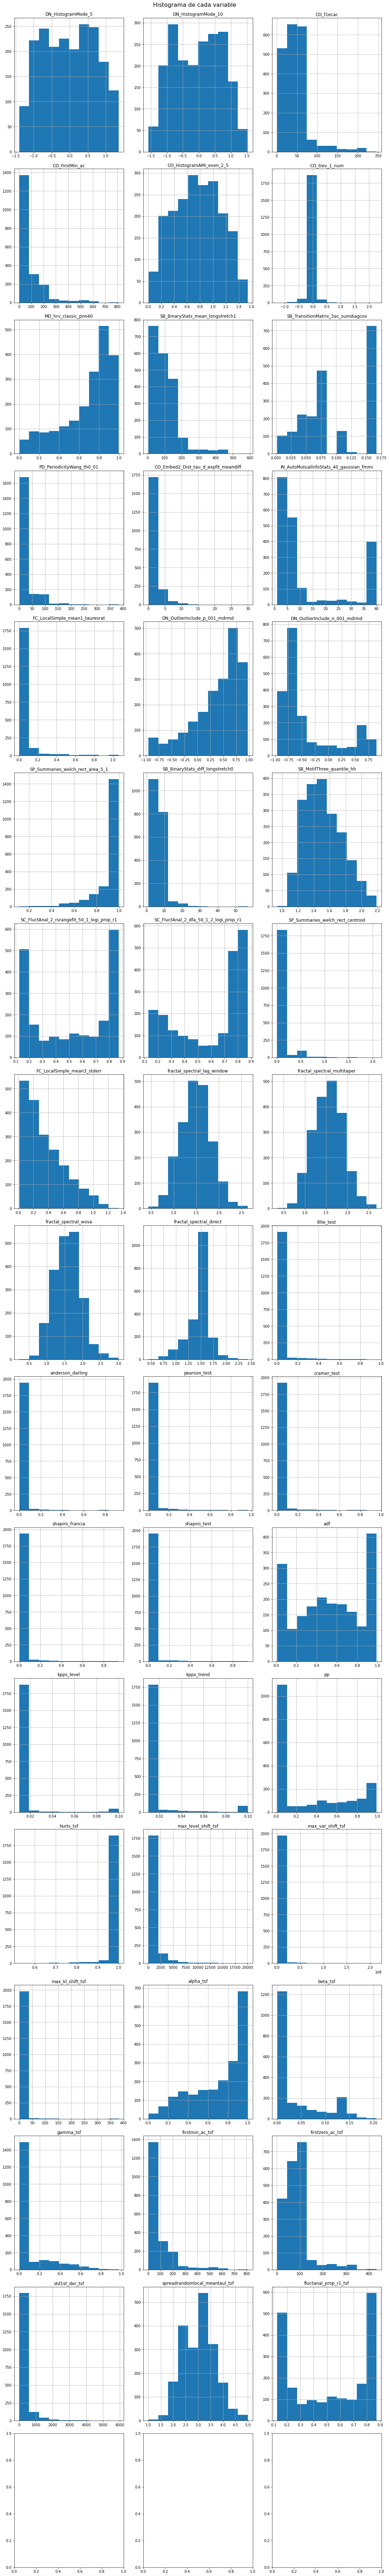

In [3]:
fig0, axs0 = pyplot.subplots(17, 3, constrained_layout=True, figsize=(15,100))
fig0.suptitle('Histograma de cada variable', fontsize=16)

d = 0
for i in range(16):
  for j in range(3):
    axs0[i,j].set_title(X.columns[d])
    X.iloc[:, d].hist(ax=axs0[i,j])
    d += 1
pyplot.show()

### BoxPlot

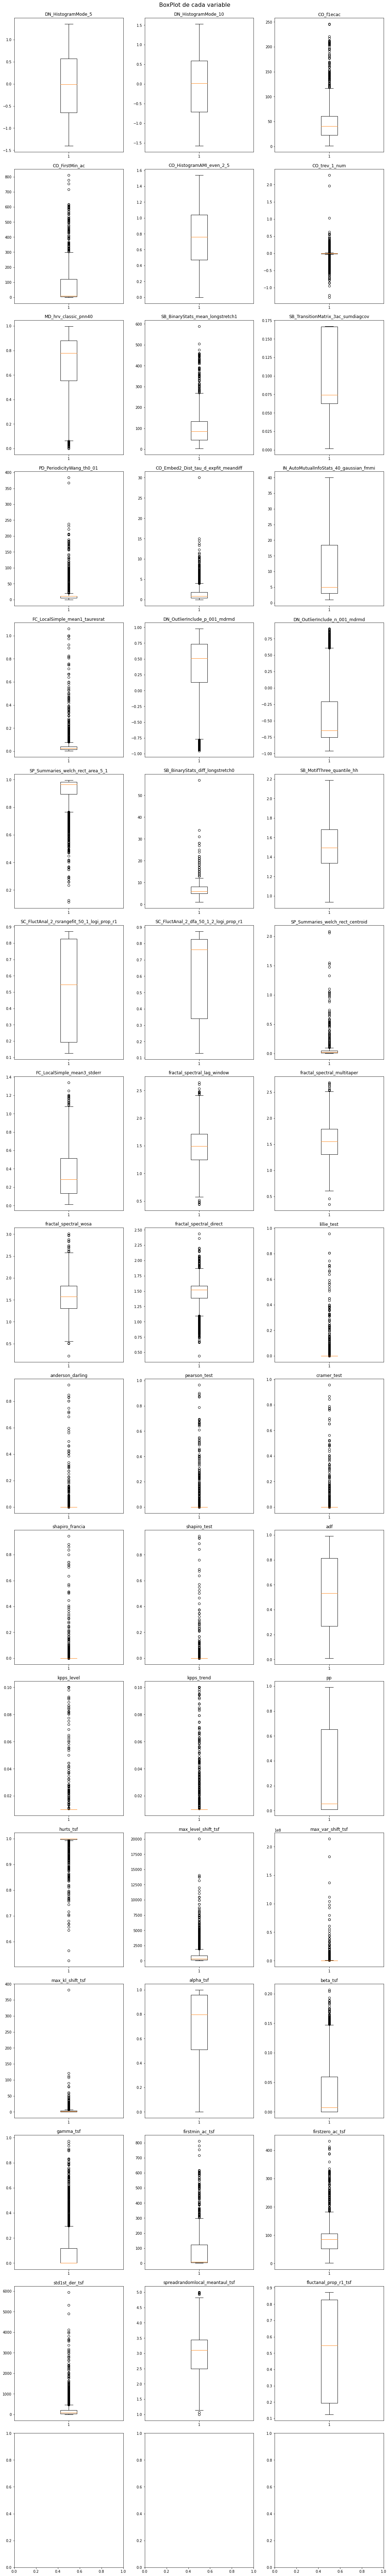

In [4]:
fig1, axs1 = pyplot.subplots(17, 3, constrained_layout=True, figsize=(15,100))
fig1.suptitle('BoxPlot de cada variable', fontsize=16)

d = 0
for i in range(16):
  for j in range(3):
    axs1[i,j].set_title(X.columns[d])
    axs1[i,j].boxplot(X.iloc[:, d])
    d += 1
pyplot.show()

## Escalado de los datos

In [5]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X)

[[0.43251595 0.34350633 0.10612245 ... 0.14396151 0.4725     0.00727217]
 [0.28924875 0.23297284 0.06938776 ... 0.05938634 0.3        0.00727217]
 [0.12437789 0.22508039 0.4        ... 0.01975123 0.5975     0.03636082]
 ...
 [0.92219036 0.5596708  0.15918367 ... 0.01394623 0.335      0.47136849]
 [0.64039068 0.69721607 0.00816327 ... 0.01486527 0.4225     0.80588806]
 [0.6981706  0.74876399 0.07755102 ... 0.00987075 0.3325     0.50177936]]


## Agrupación

### Kmeans

### Métricas

#### silhouette_score

Métrica de validación interna que evalua a cohesion y separacion de todos los datos con respecto a otros

#### silhouette_samples

Métrica de validación interna que evalua a cohesion y separacion de cada uno de los datos con respecto a otros

#### Calinski_harabasz_score

La puntuación se define como la relación entre la dispersión dentro de los conglomerados y la dispersión entre los conglomerados.


https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

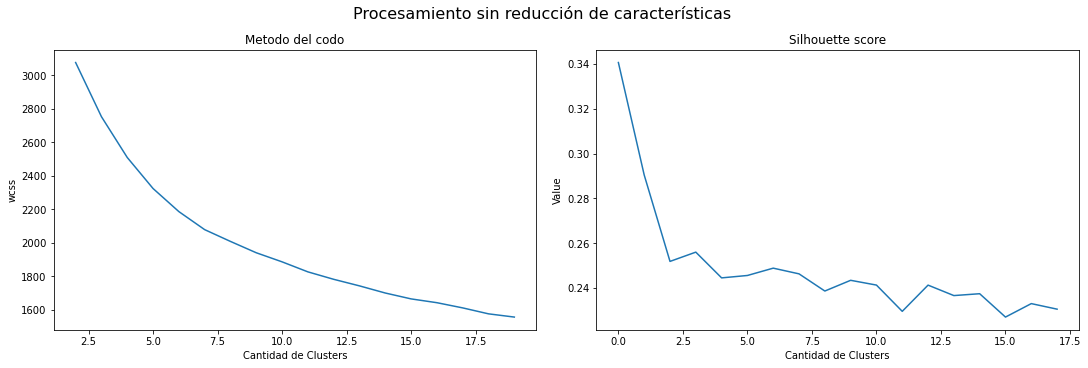

In [19]:
def within_sum_of_squares(data, centroids, labels):
    SSW = 0
    for l in np.unique(labels):
        data_l = data[labels == l]
        resid = data_l - centroids[l]
        SSW += (resid**2).sum()
    return SSW


max_clusters = 20
silhoutte_list = []

wcss= []
for i in range(2,max_clusters):
    kmeans = KMeans(n_clusters=i, init="k-means++",max_iter=300,n_init=10, random_state=0) #max_iter por default es 300
    kmeans.fit(X)
    labels = kmeans.labels_
    dist = pairwise_distances(X)
    dunn_index = dunn(dist, labels)
    print(dunn_index)
    silhoutte = silhouette_score(X, labels, metric='sqeuclidean')
    silhoutte_list.append(silhoutte)
    wcss.append(kmeans.inertia_)
    

fig1, axs1 = pyplot.subplots(1, 2, constrained_layout=True, figsize=(15,5))
fig1.suptitle("Procesamiento sin reducción de características ", fontsize=16)
axs1[0].set_title("Metodo del codo")
axs1[0].plot(range(2,max_clusters),wcss)
axs1[0].set_xlabel('Cantidad de Clusters')  # Add an x-label to the axes.
axs1[0].set_ylabel('wcss')

index = np.array(range(len(silhoutte_list)))

axs1[1].set_title("Silhouette score")
axs1[1].plot(index, np.array(silhoutte_list))
axs1[1].set_xlabel('Cantidad de Clusters')
axs1[1].set_ylabel('Value')

pyplot.show()



### Reduccion de dimencionalidad

#### FA

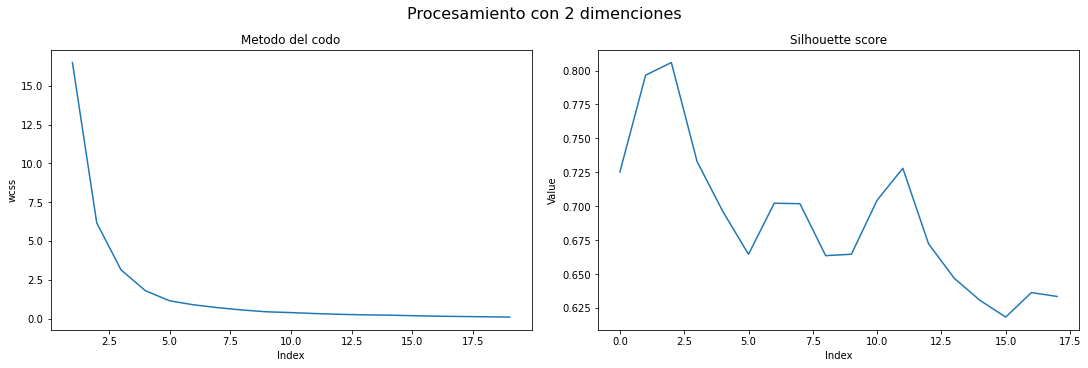

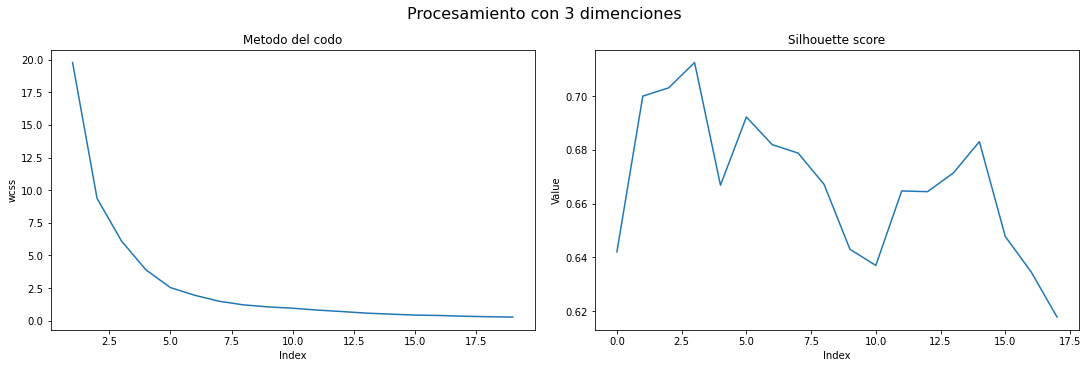

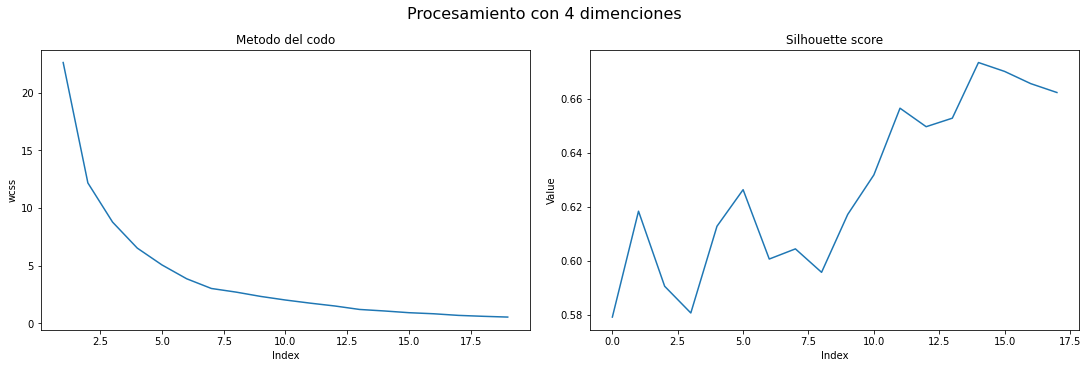

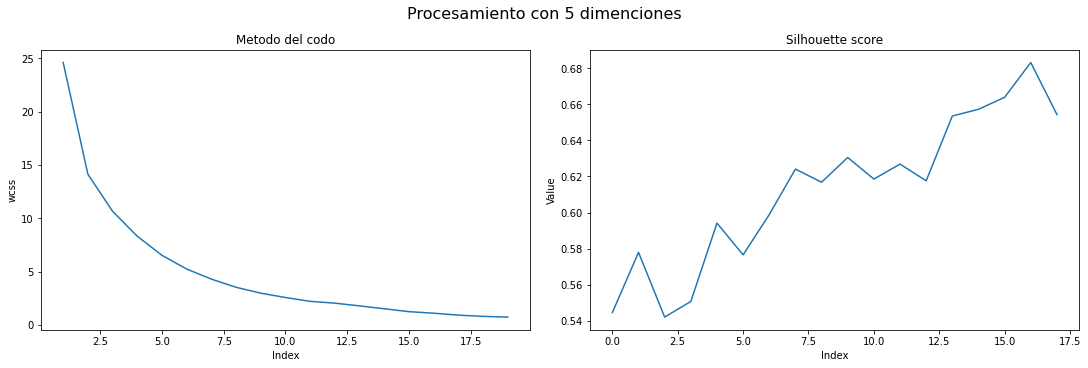

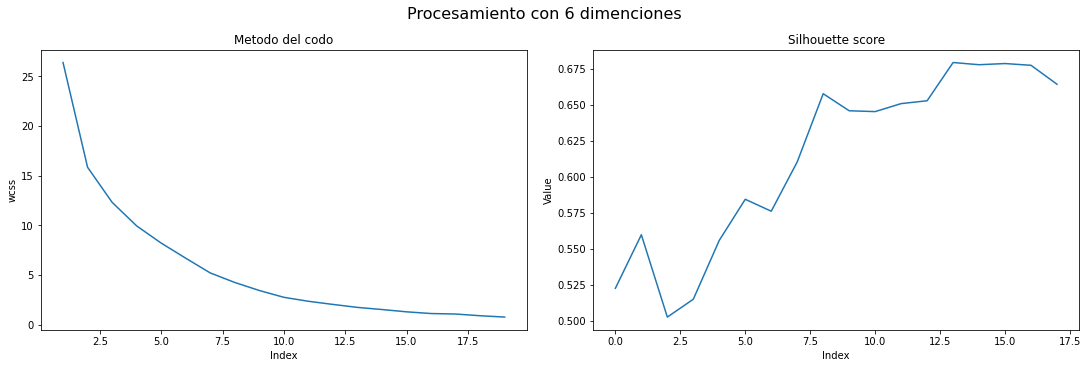

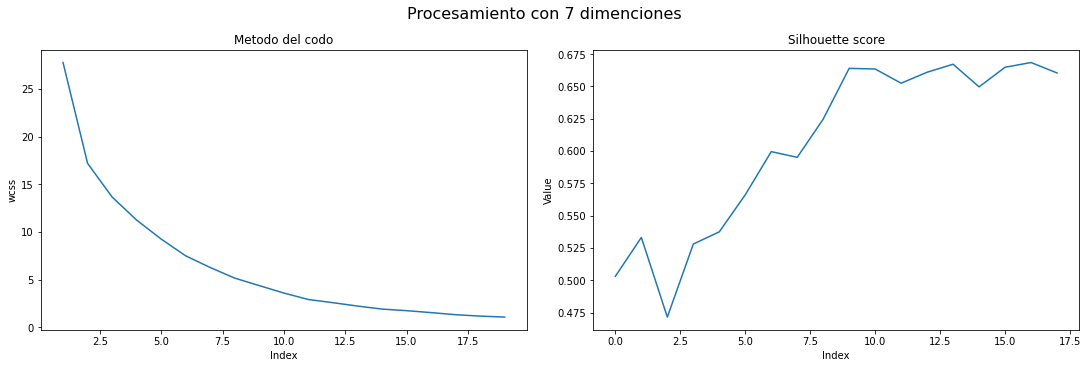

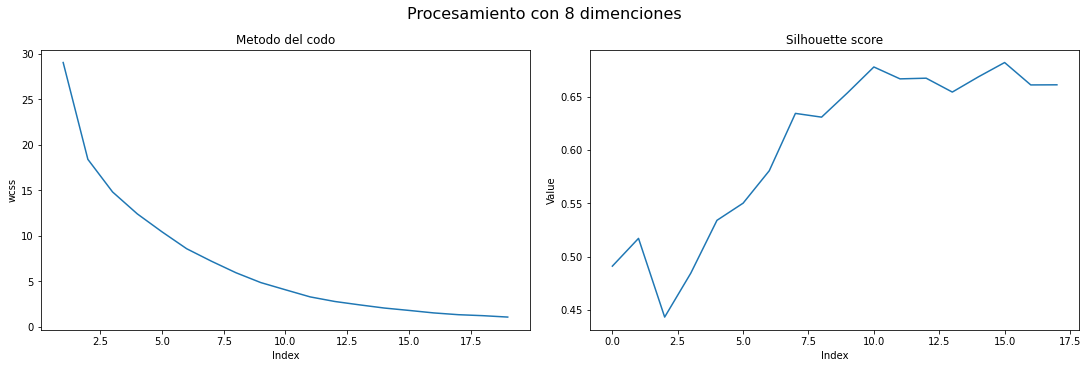

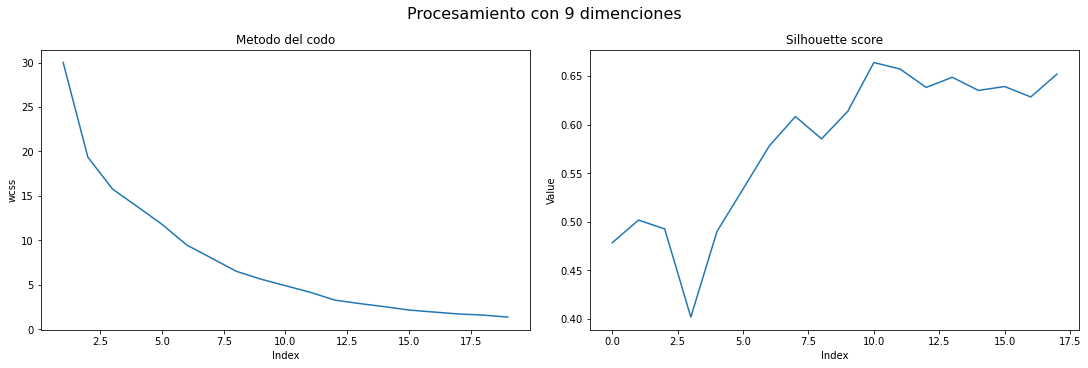

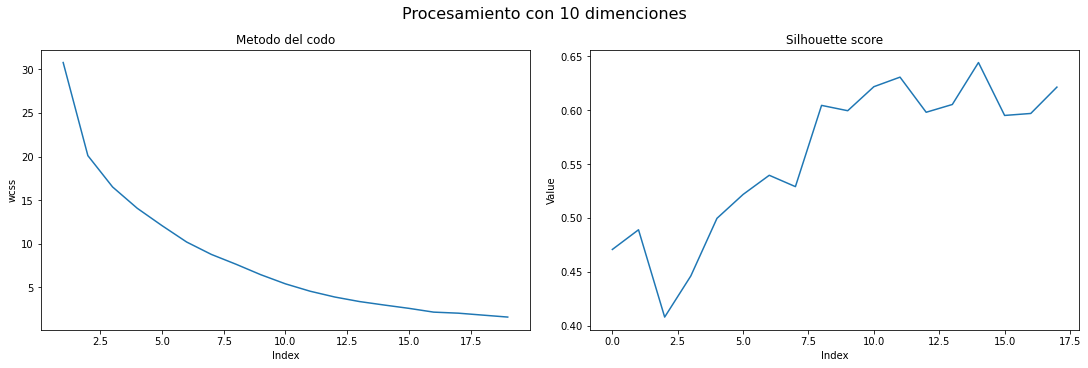

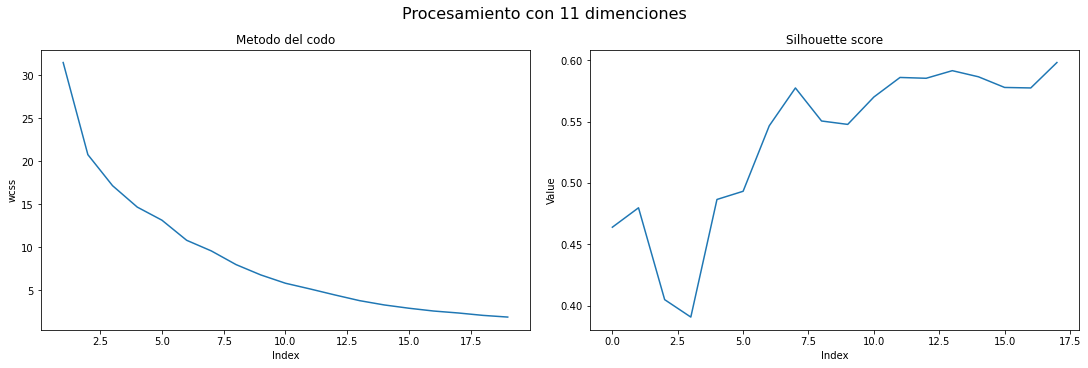

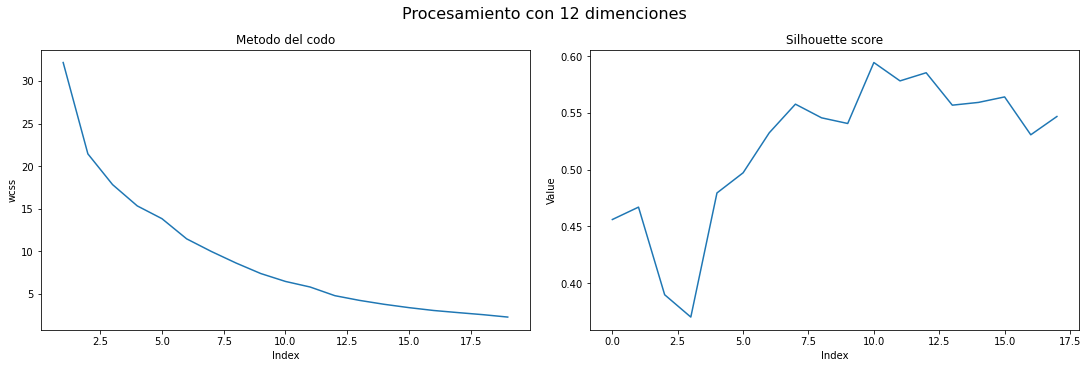

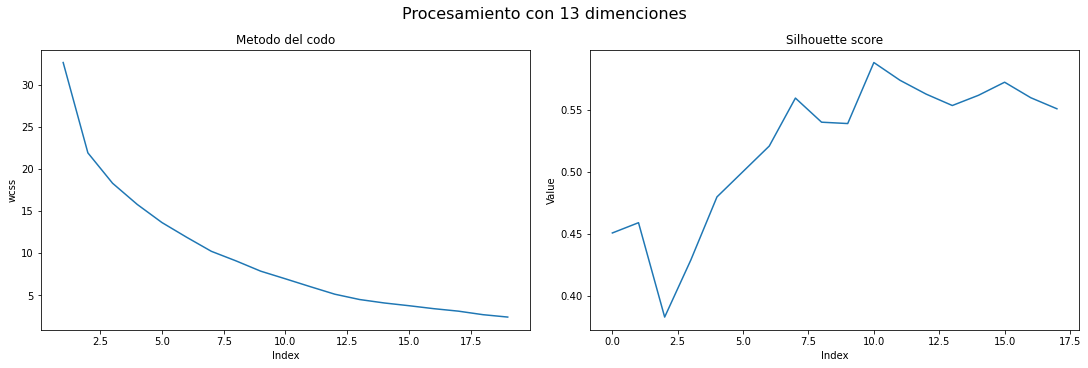

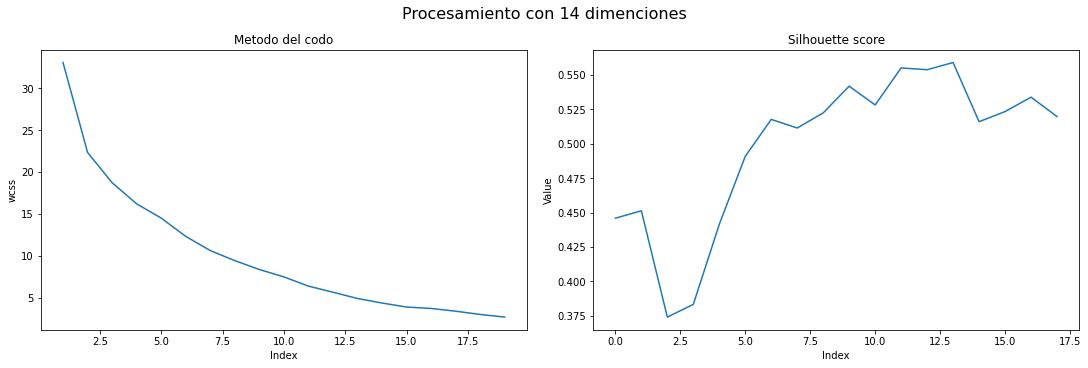

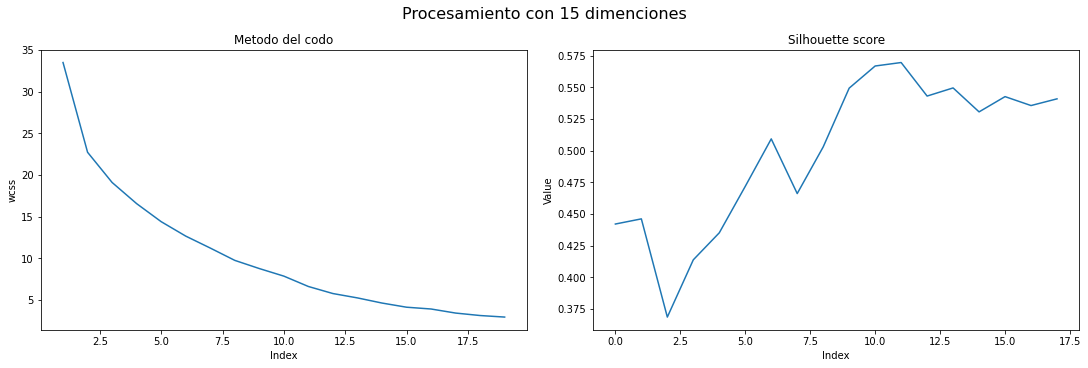

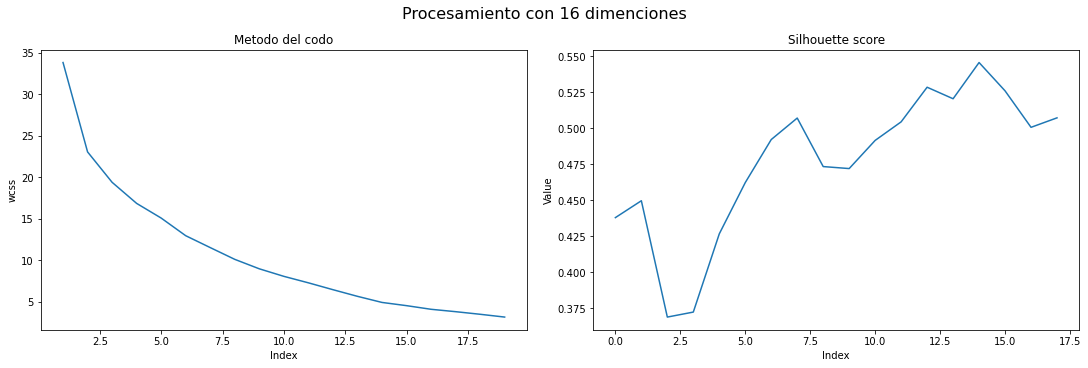

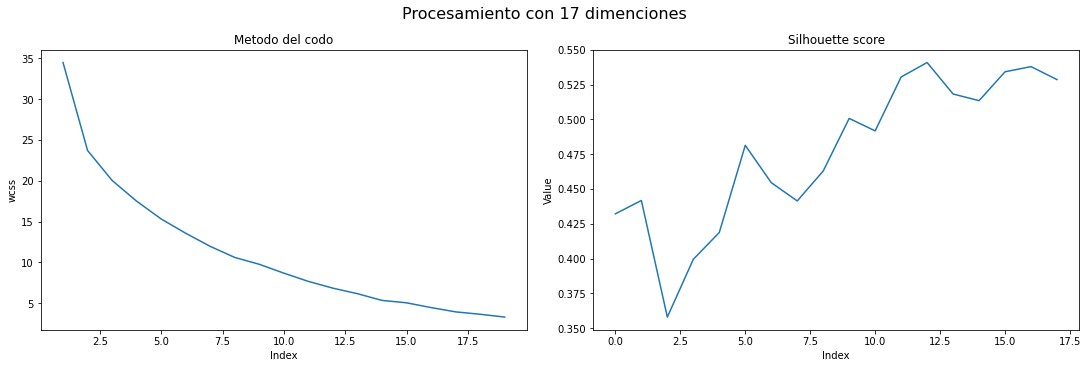

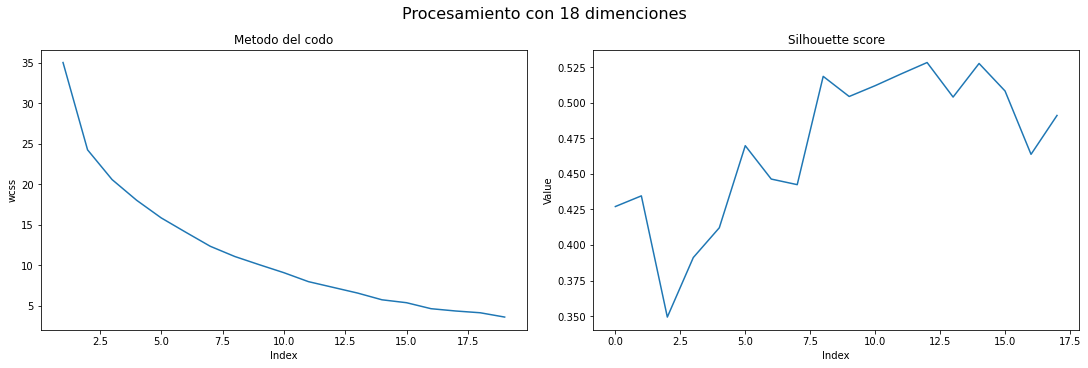

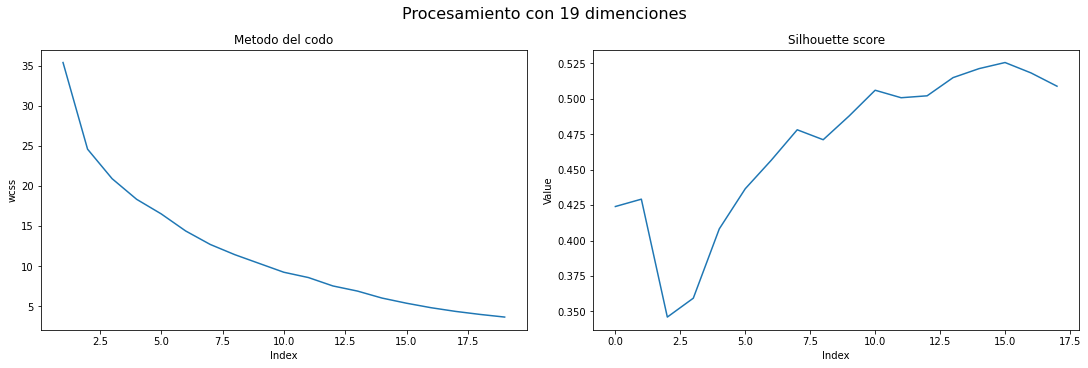

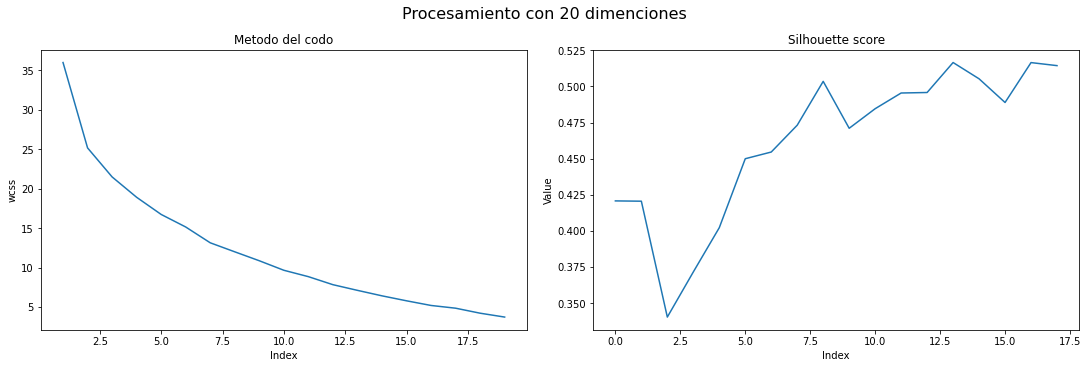

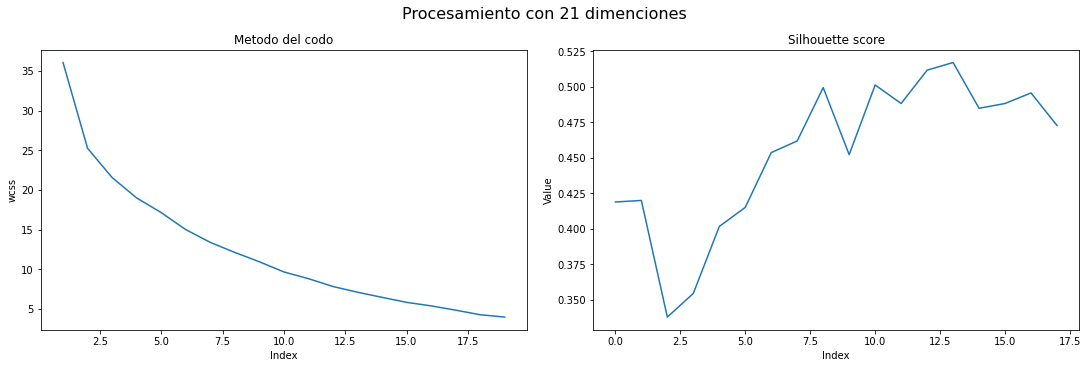

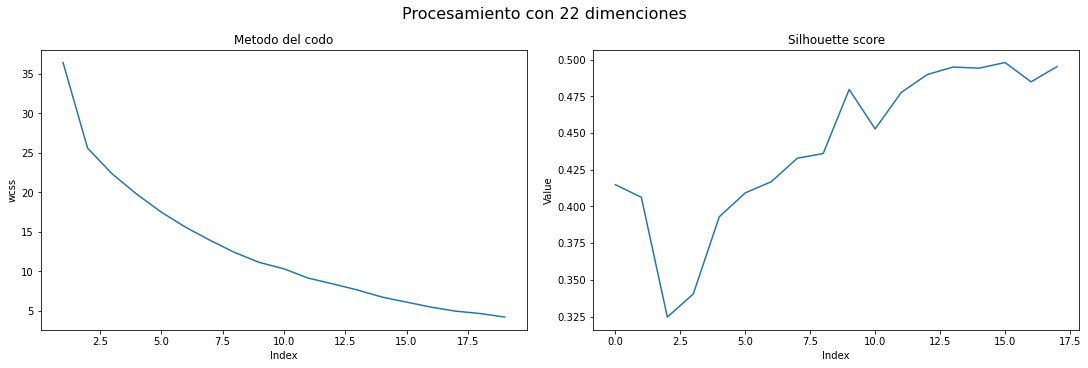

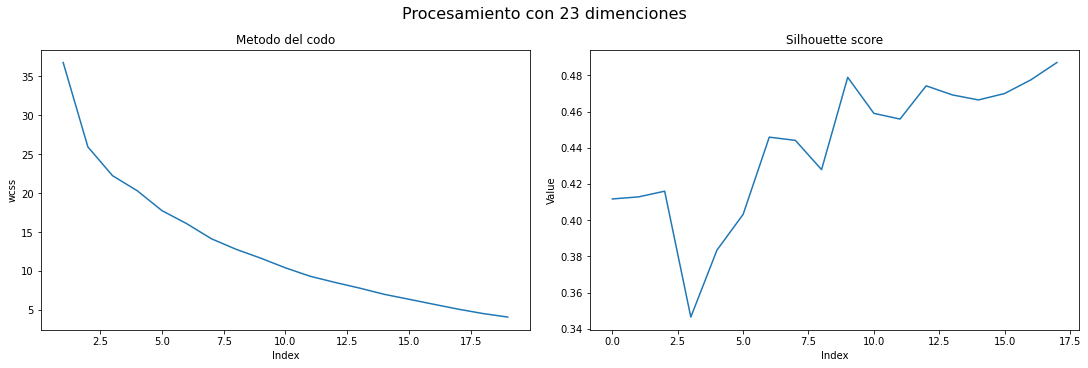

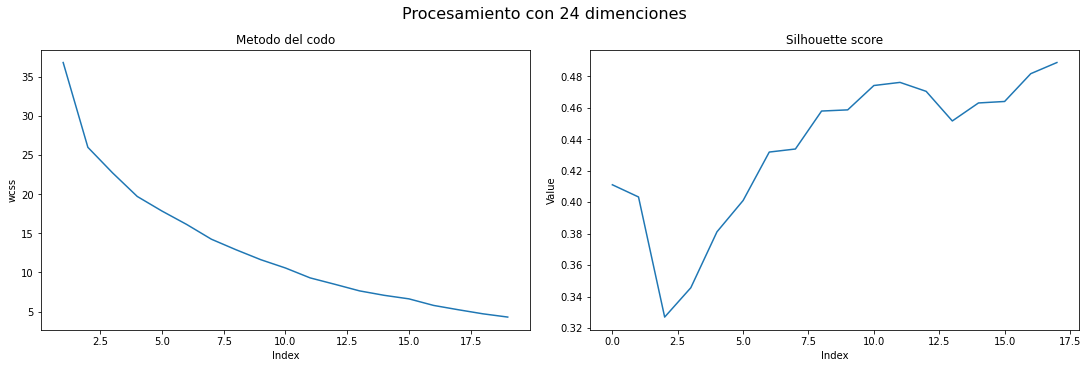

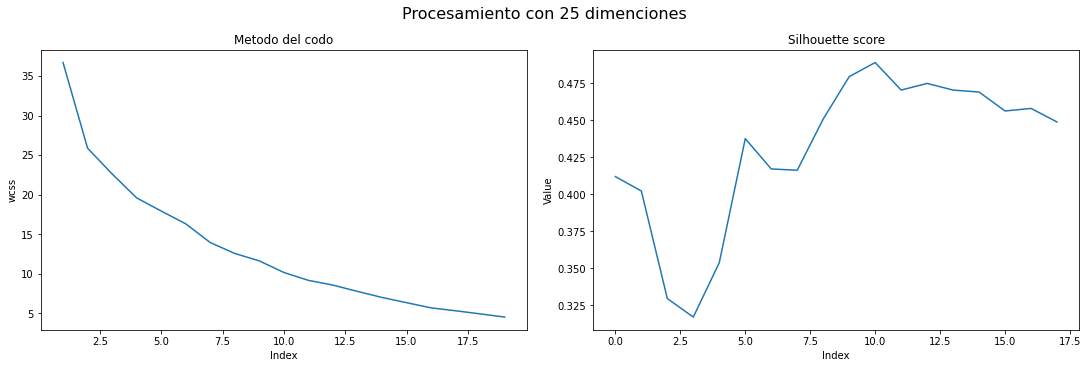

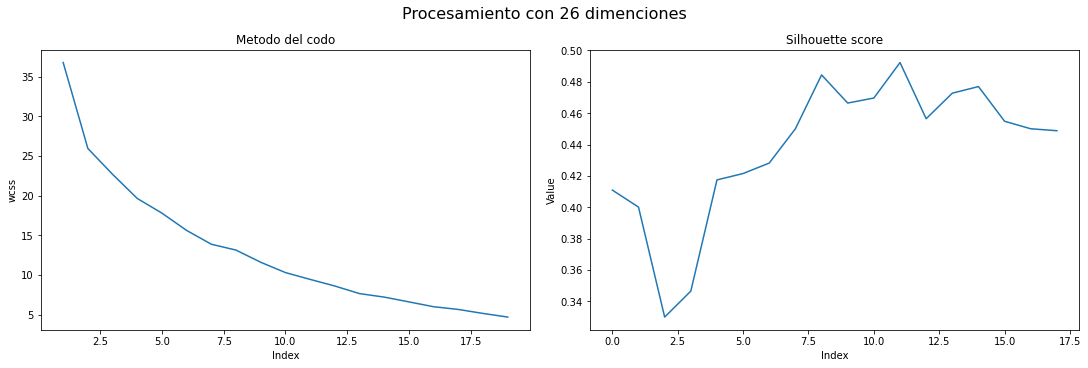

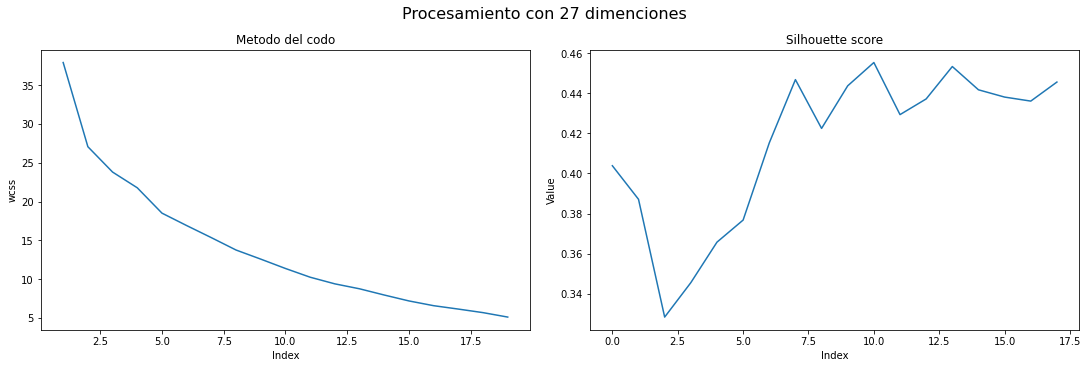

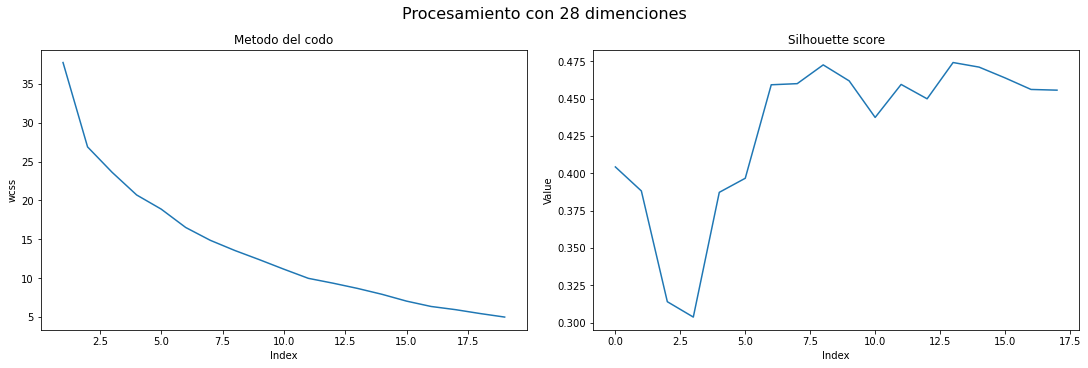

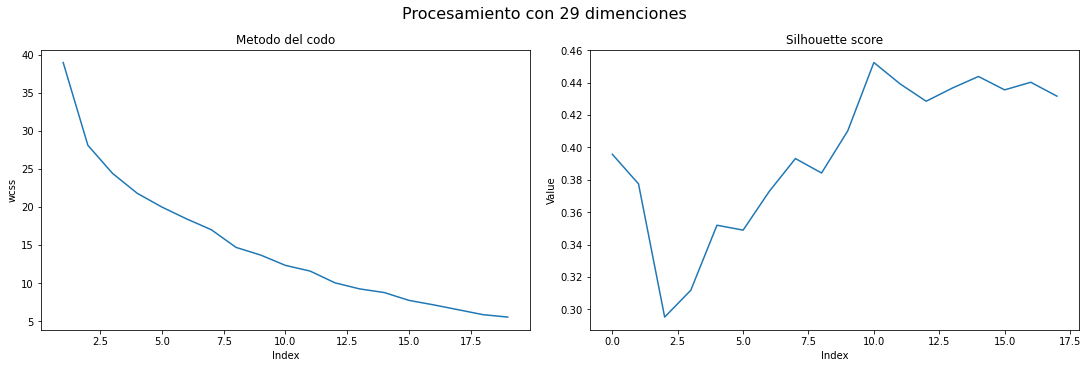

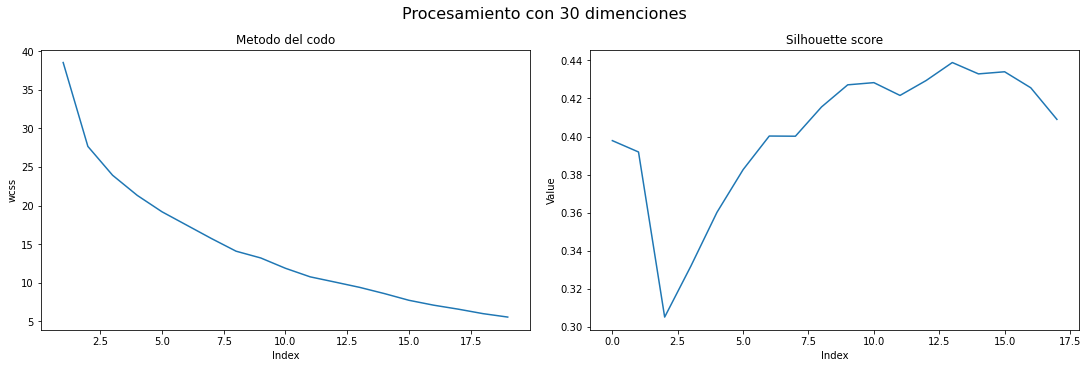

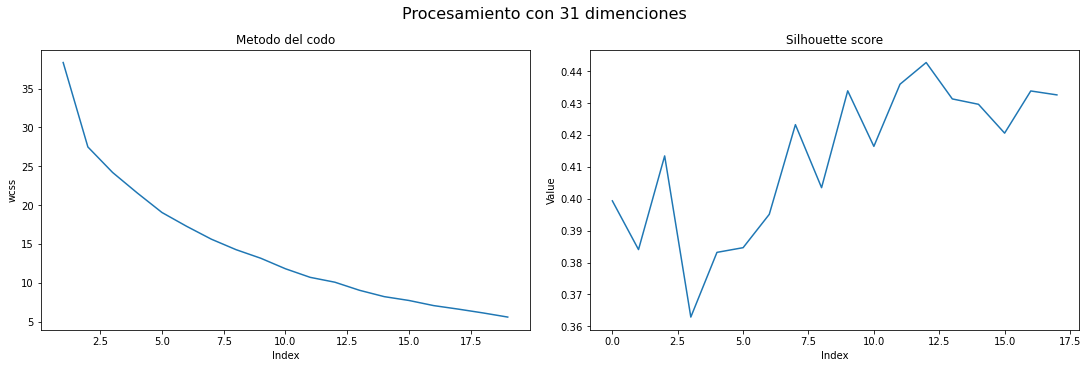

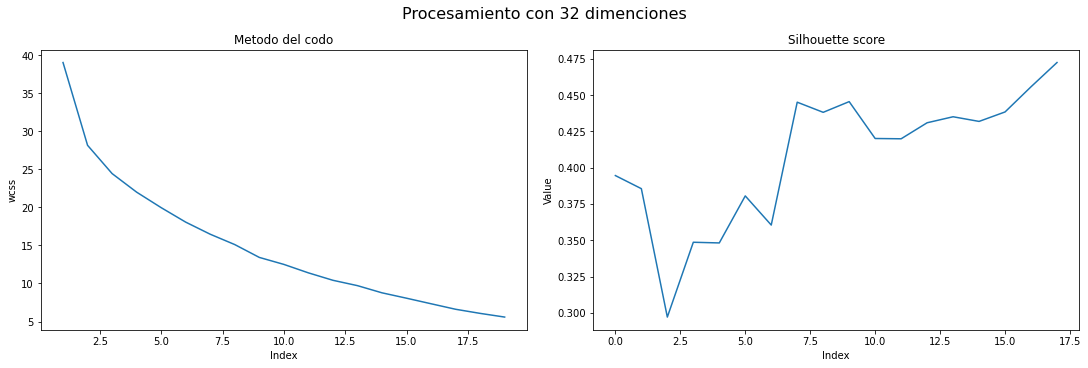

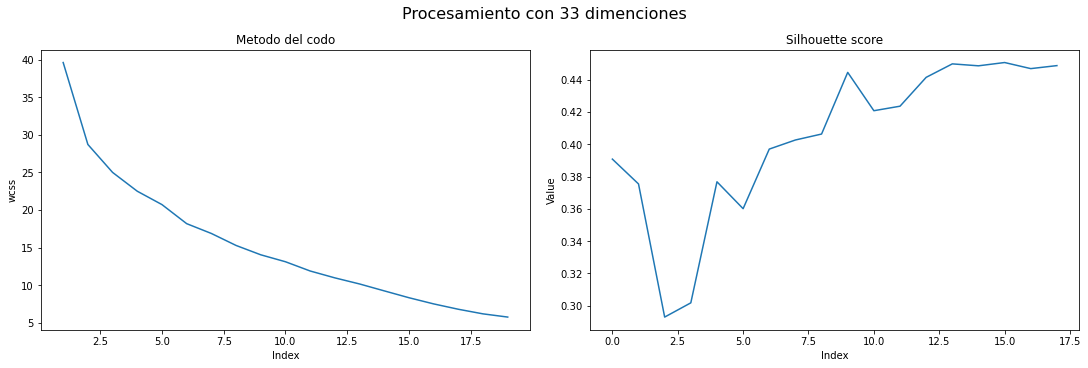

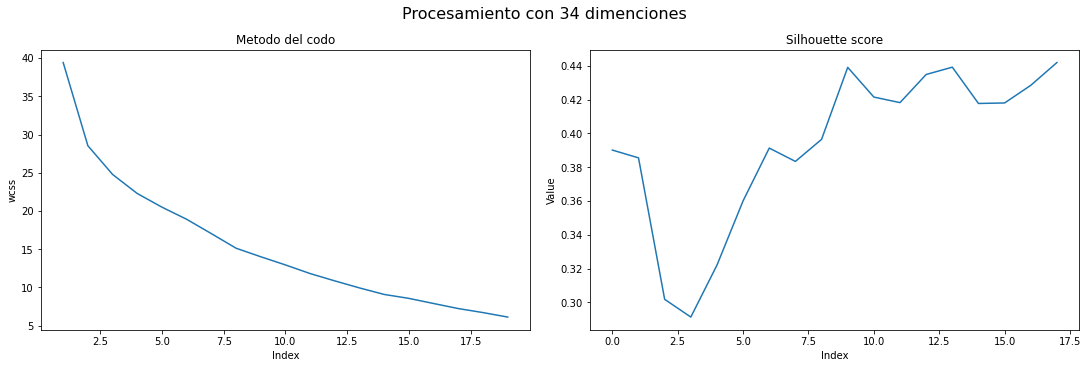

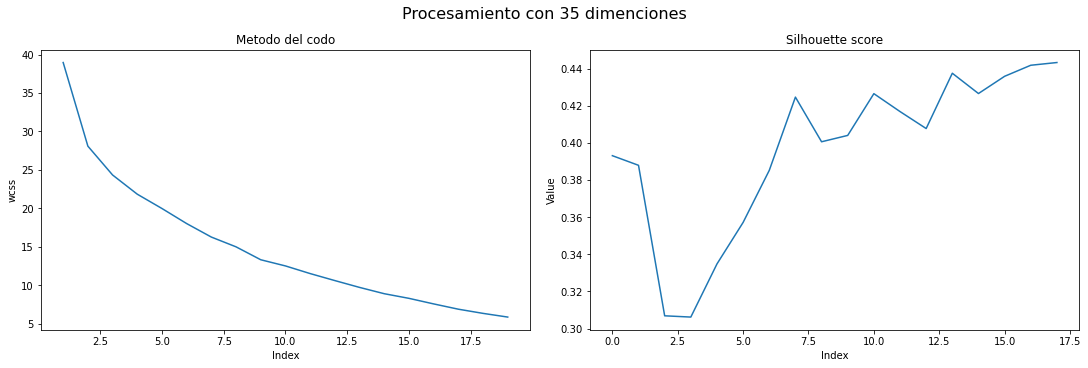

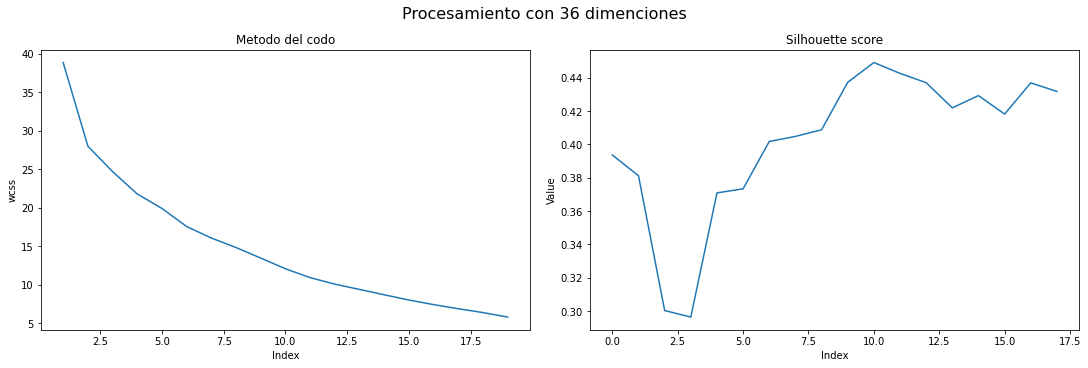

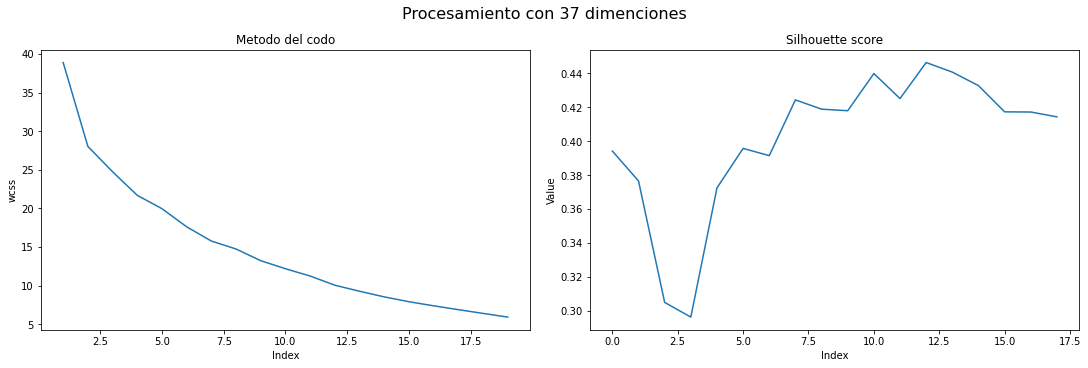

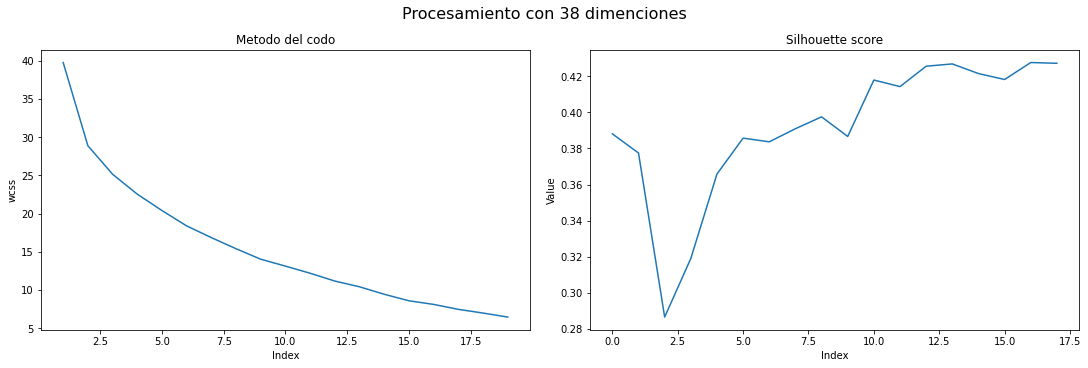

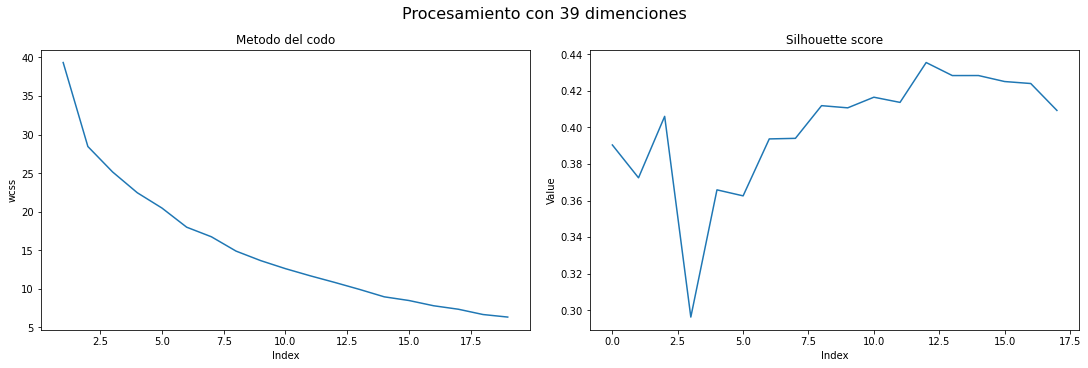

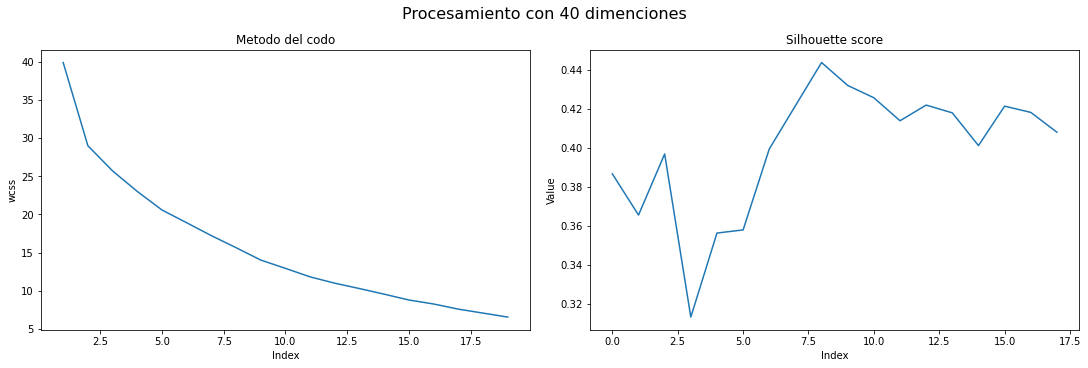

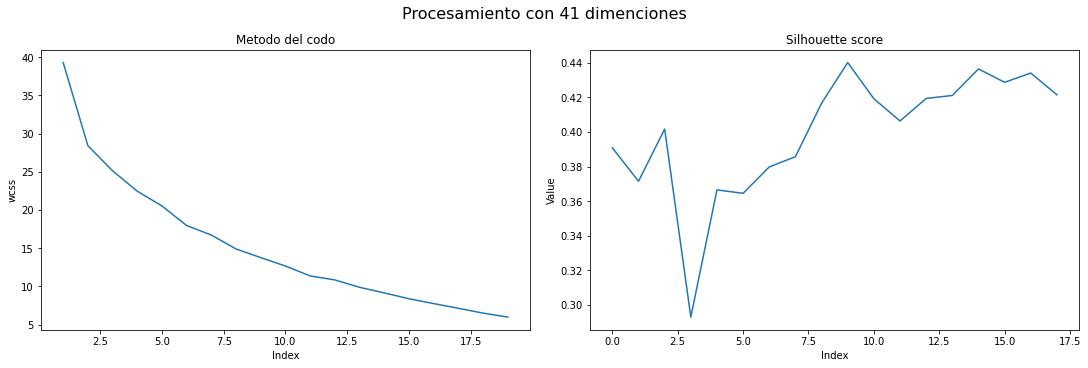

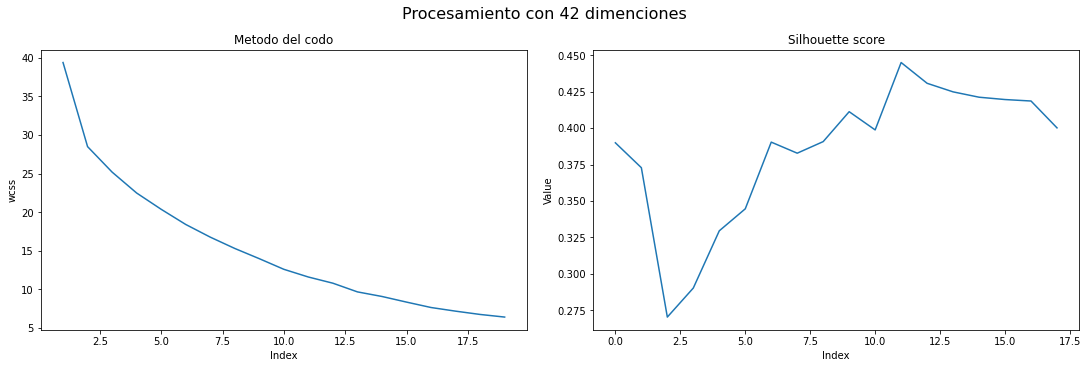

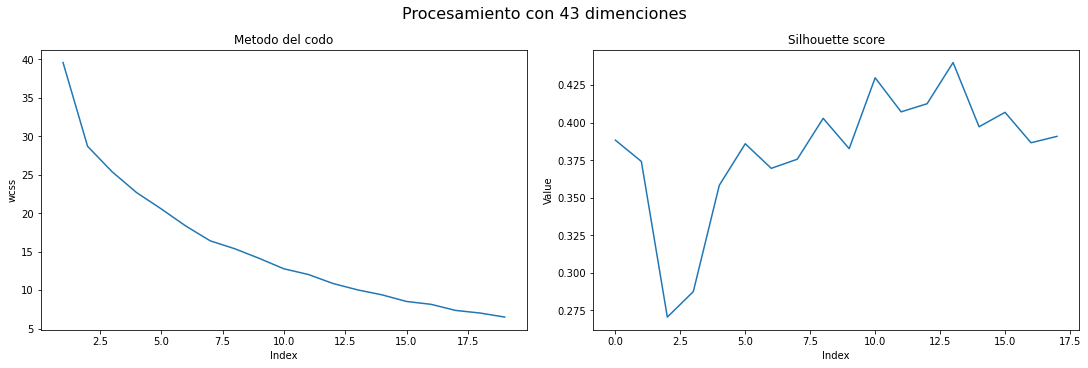

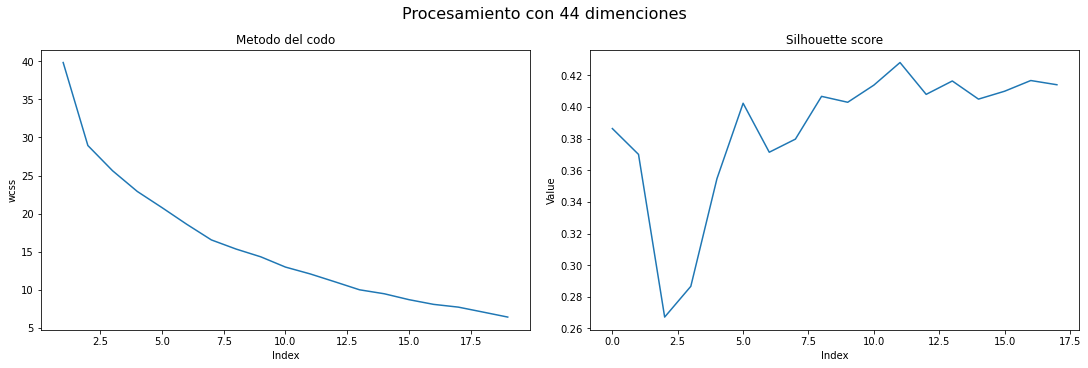

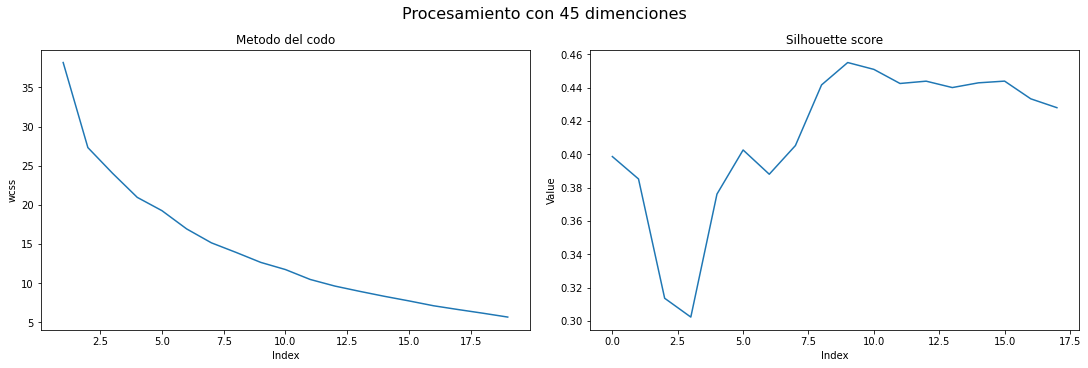

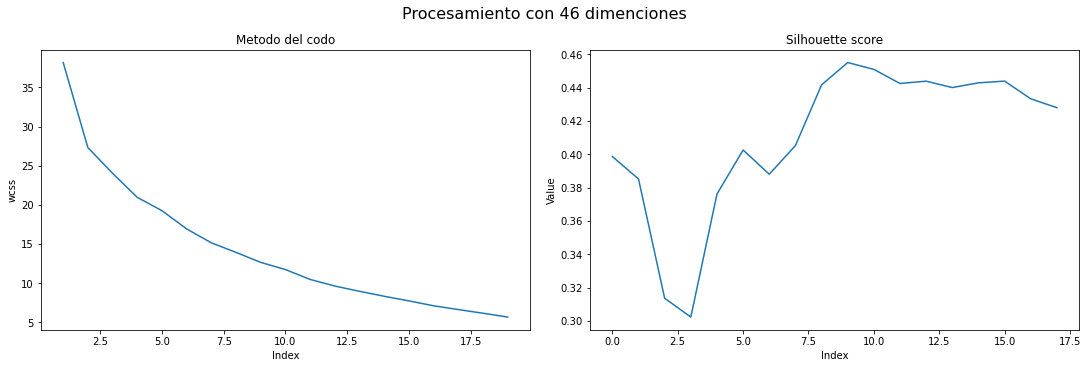

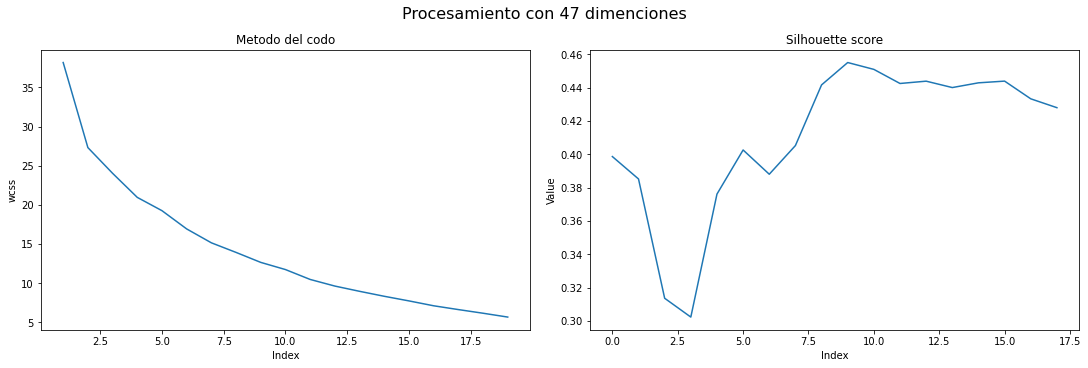

In [16]:
max_clusters = 20
wcss= []
columns_counts = len(data_frame.columns)
silhoutte_list = []
sample_silhouette_values_list = []
chs_list = []
dbs_list = []

for i in range(2, columns_counts):
    wcss= []
    silhoutte_list = []
    fa = FactorAnalyzer(rotation=None, n_factors=i)
    fa.fit(X)
    fa_x = fa.loadings_
    for j in range(1,max_clusters):
        kmeans = KMeans(n_clusters=j, init="k-means++",max_iter=300,n_init=10, random_state=0) #max_iter por default es 300
        kmeans.fit(fa_x)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        if(j>=2):
            silhoutte = silhouette_score(fa_x, labels, metric='sqeuclidean')
            silhoutte_list.append(silhoutte)
        wcss.append(kmeans.inertia_)
    
    fig1, axs1 = pyplot.subplots(1, 2, constrained_layout=True, figsize=(15,5))
    fig1.suptitle("Procesamiento con " + str(i) + " características", fontsize=16)
    axs1[0].set_title("Metodo del codo")
    axs1[0].plot(range(1,max_clusters),wcss)
    axs1[0].set_xlabel('Cantidad de Clusters')  # Add an x-label to the axes.
    axs1[0].set_ylabel('wcss')
    
    index = np.array(range(len(silhoutte_list)))
    
    axs1[1].set_title("Silhouette score")
    axs1[1].plot(index, np.array(silhoutte_list))
    axs1[1].set_xlabel('Cantidad de Clusters')
    axs1[1].set_ylabel('Value')
    
    pyplot.show()
        

### PCA

Aplicación del método de reducción de dimencionalidad para disminuir complejidad del programa

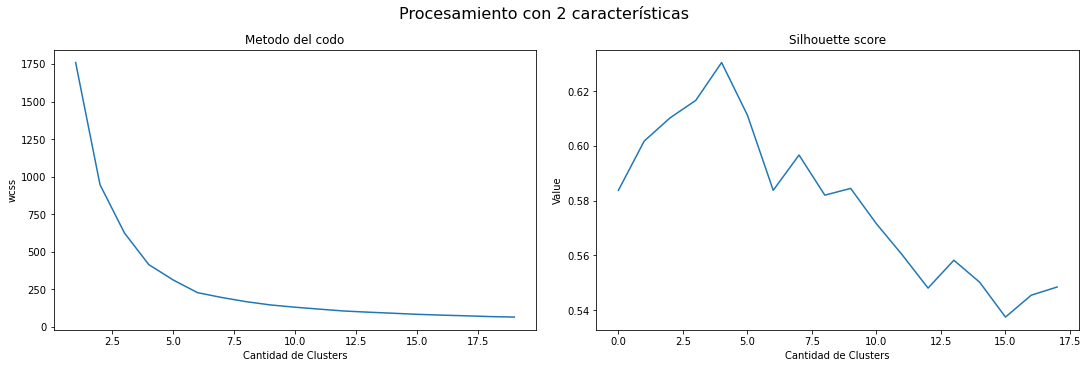

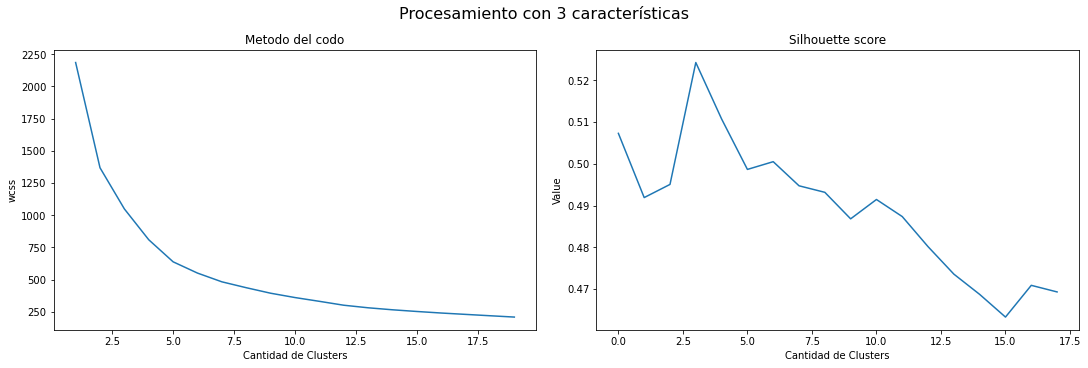

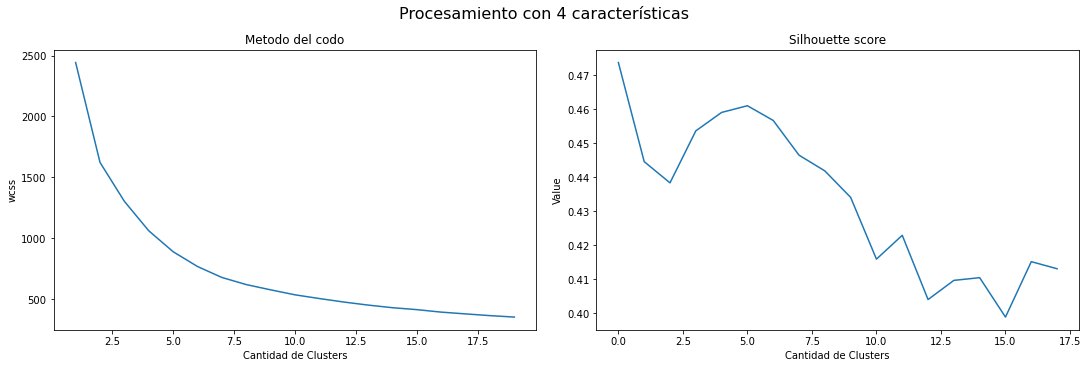

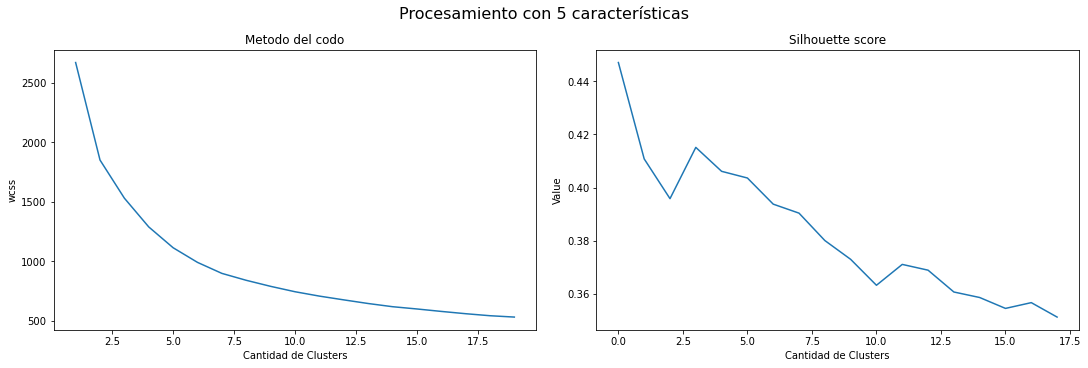

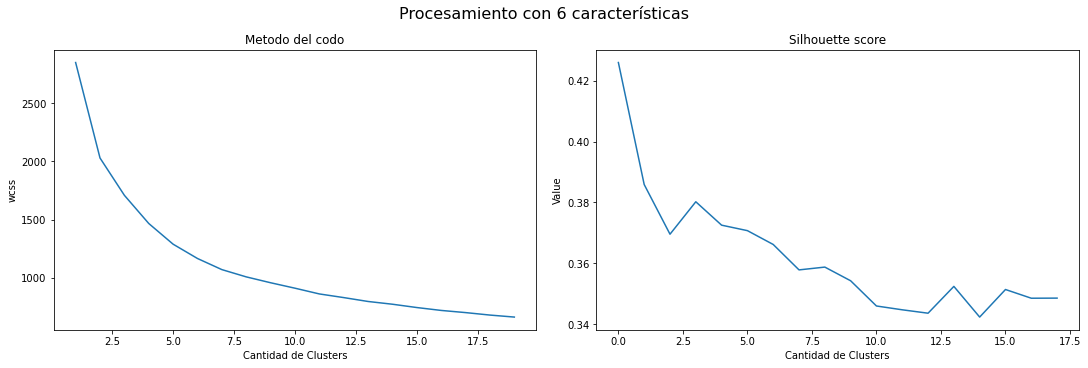

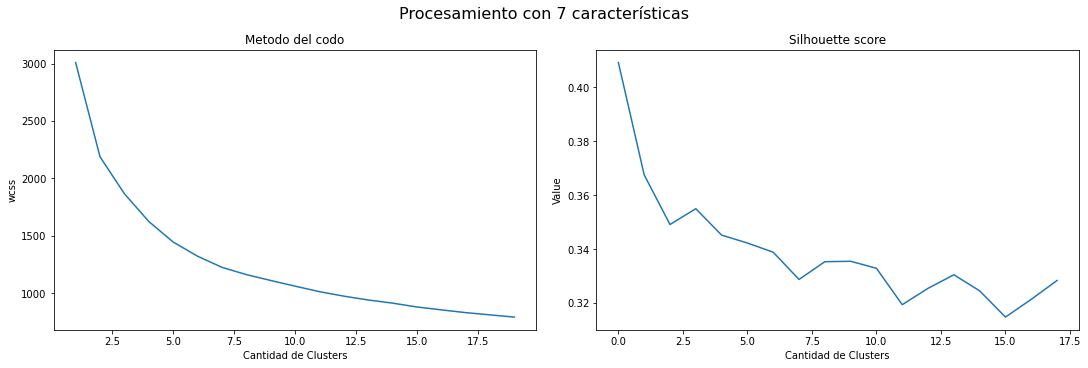

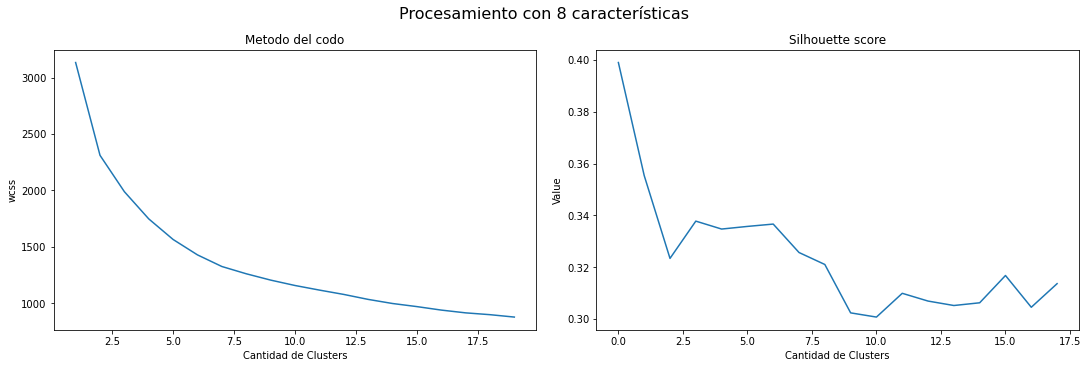

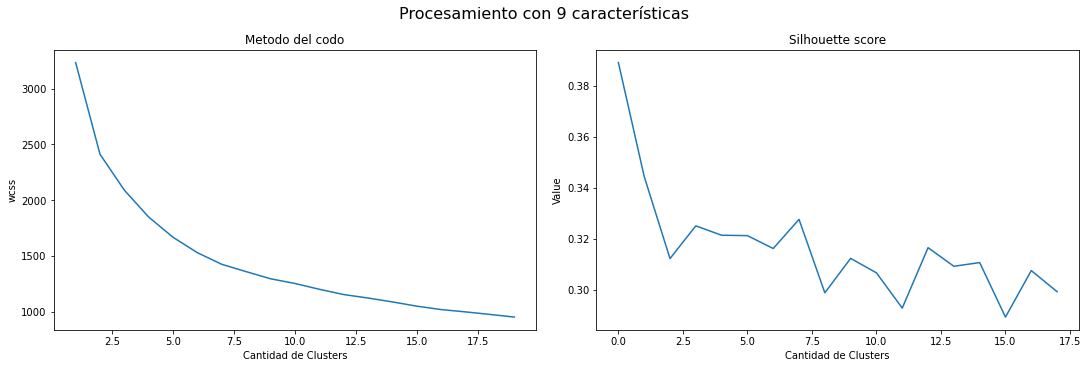

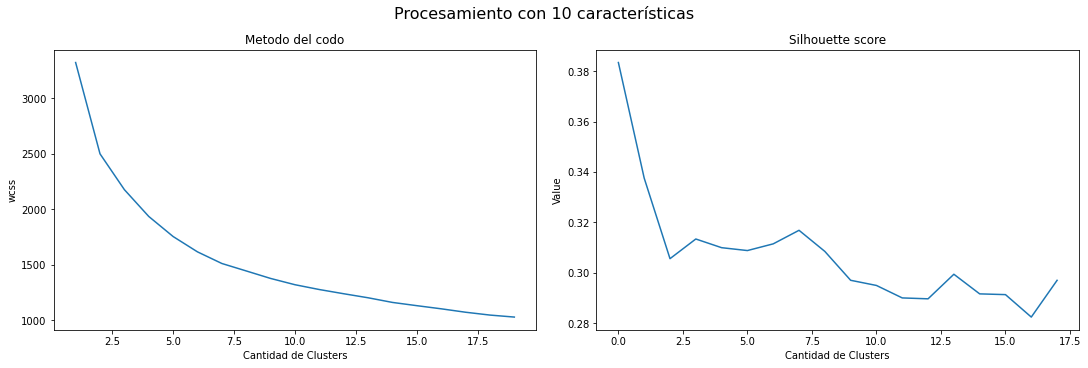

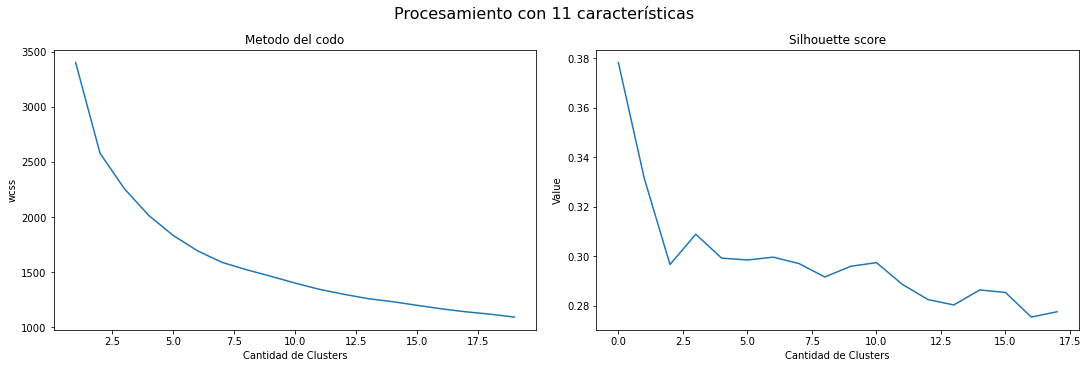

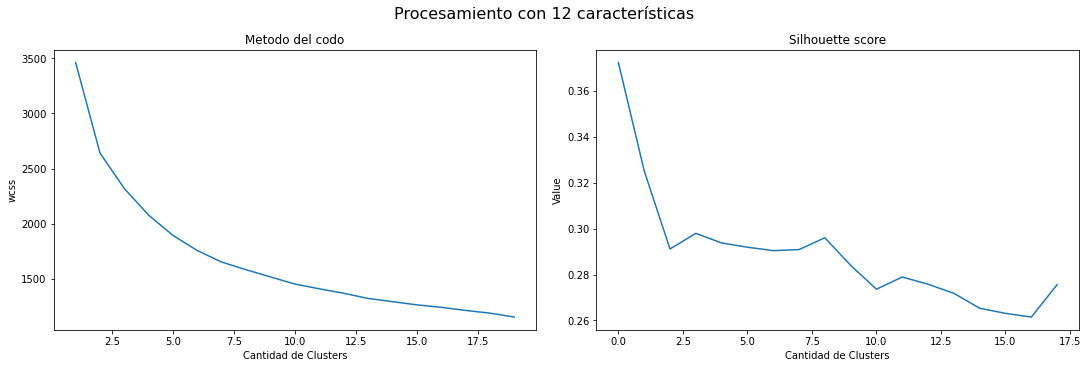

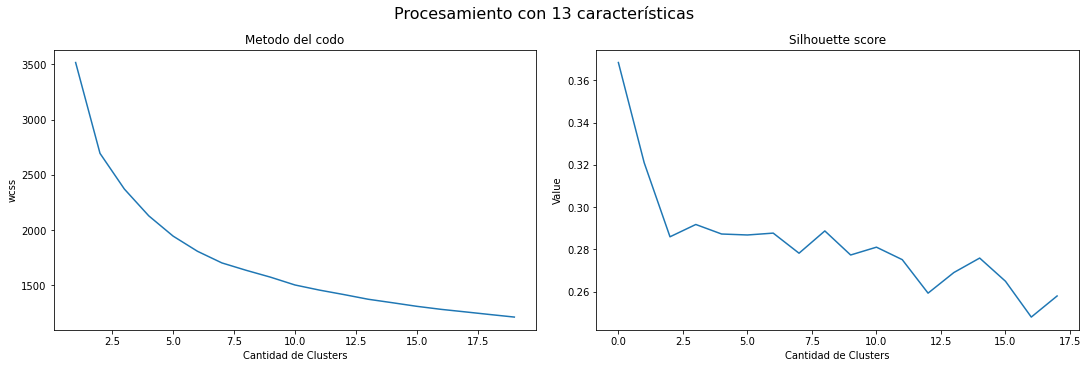

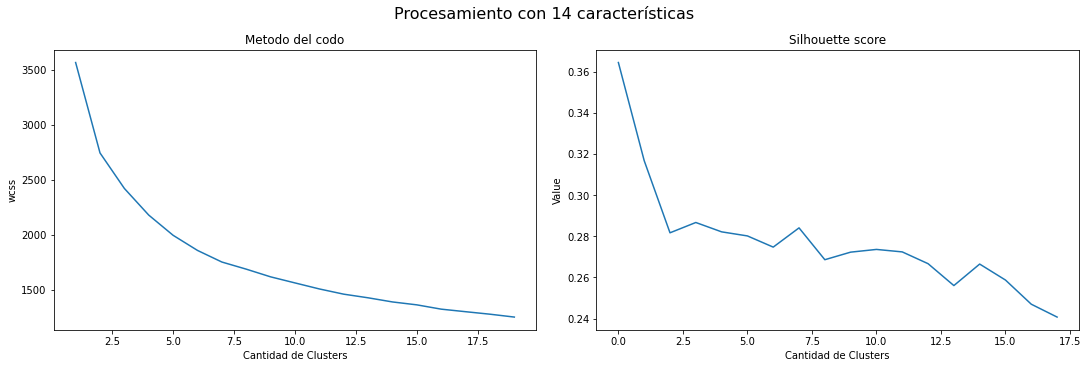

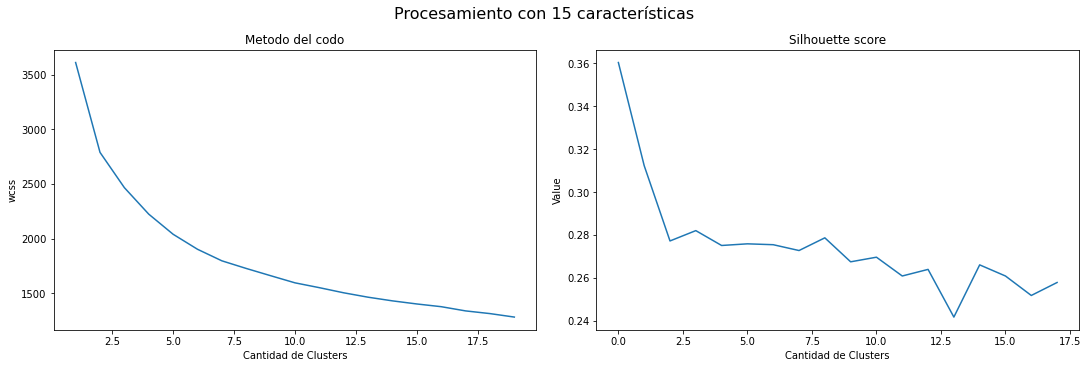

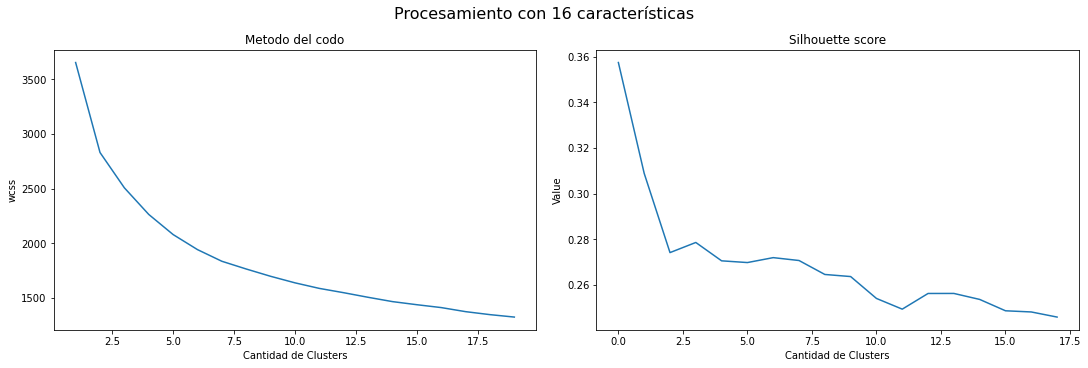

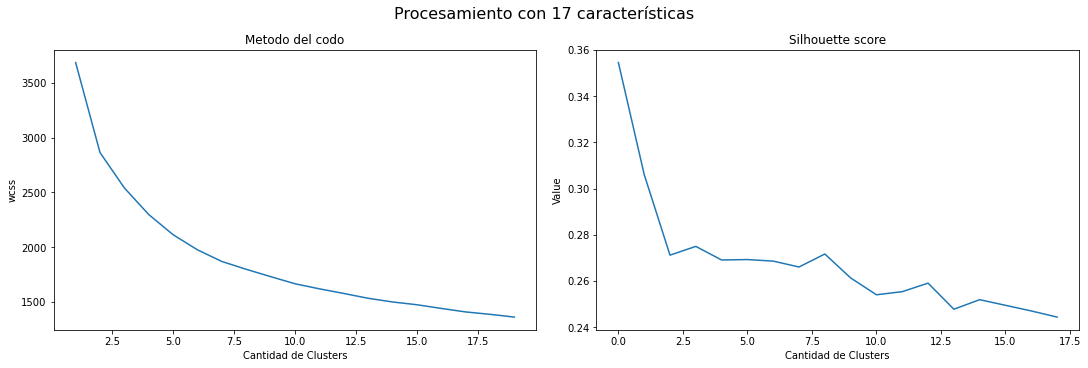

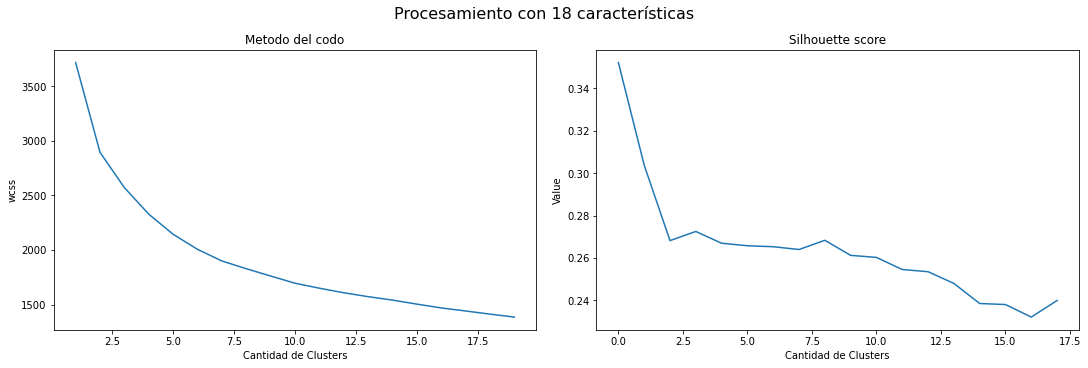

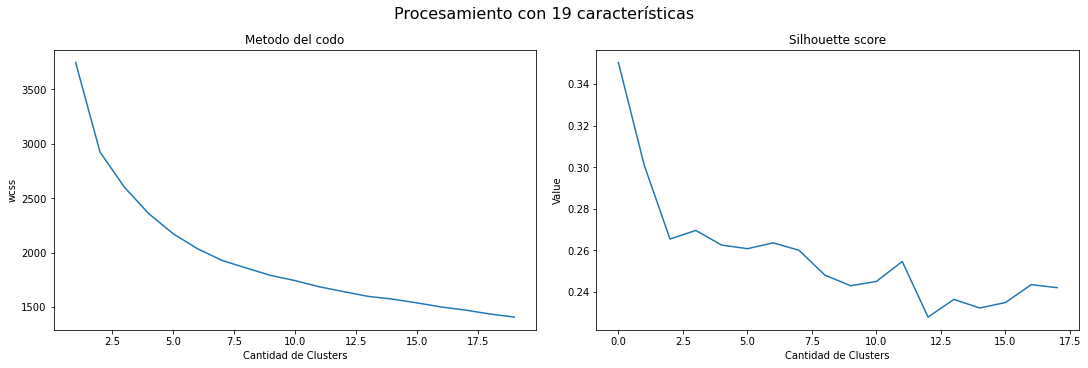

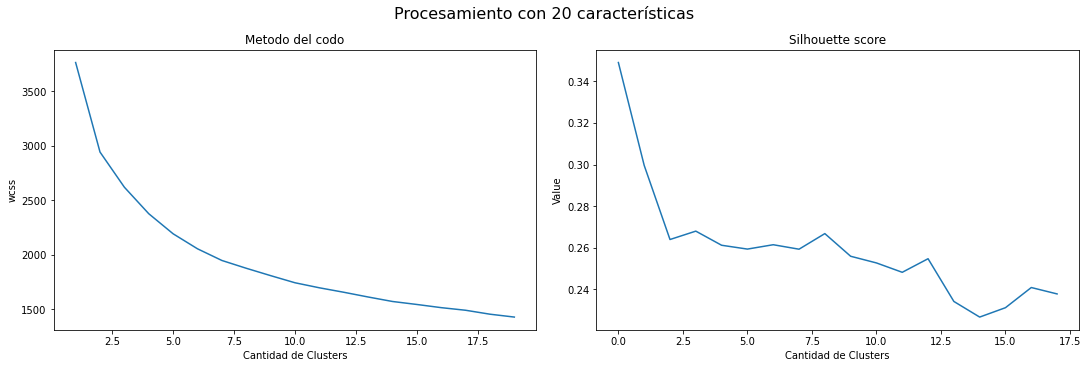

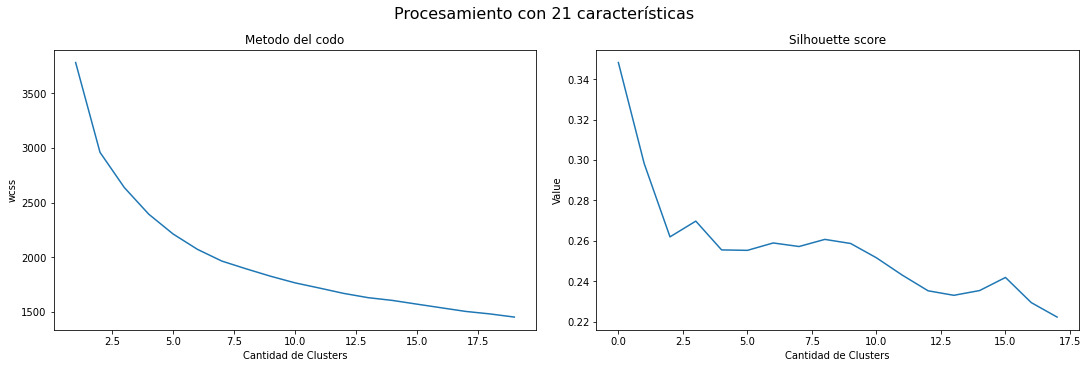

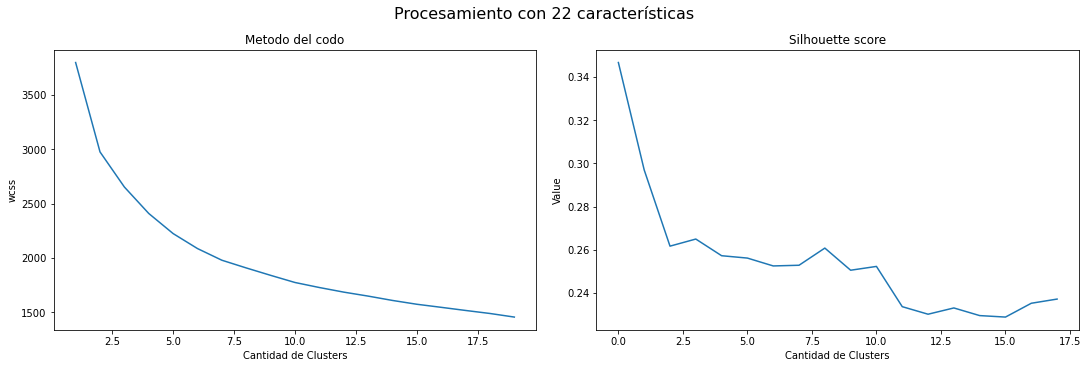

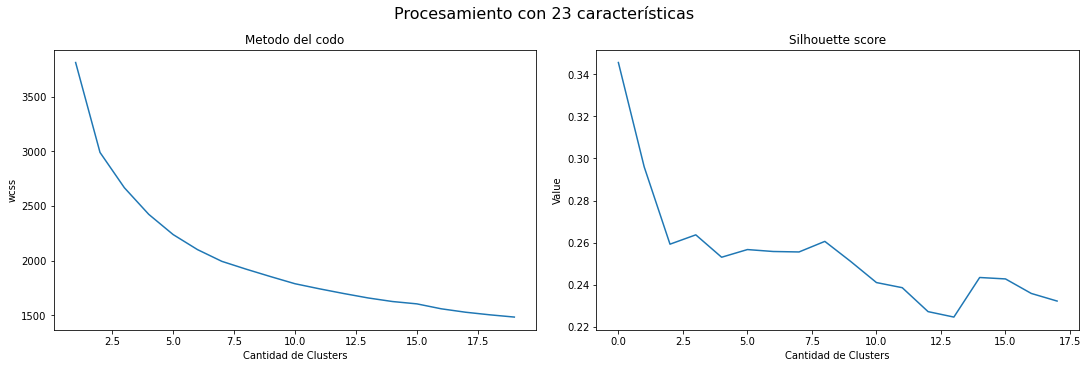

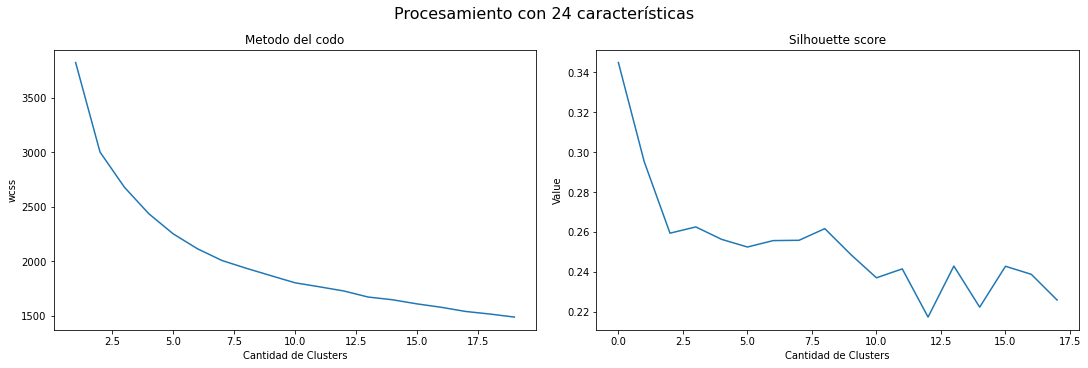

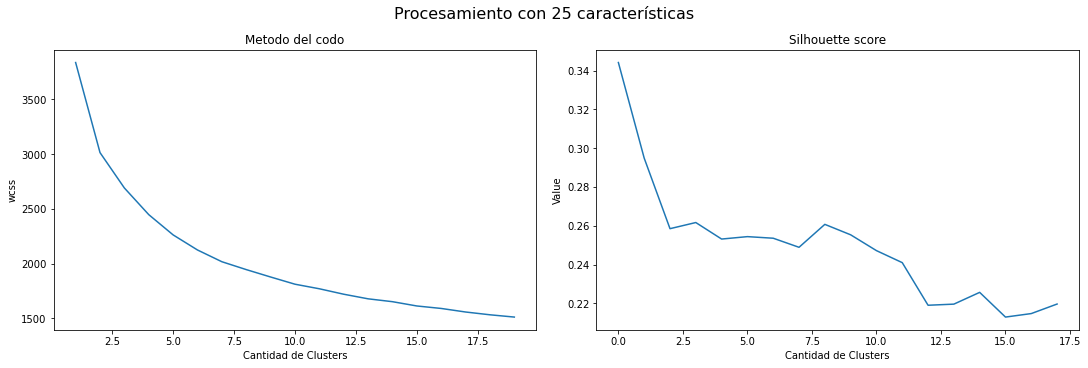

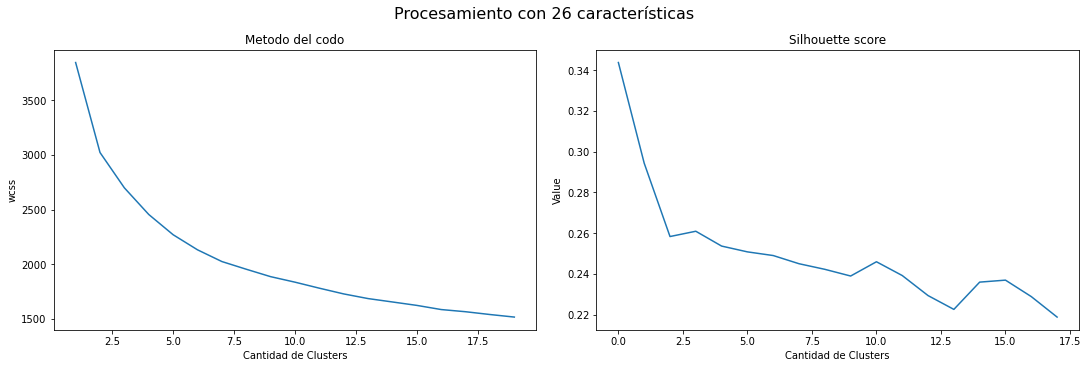

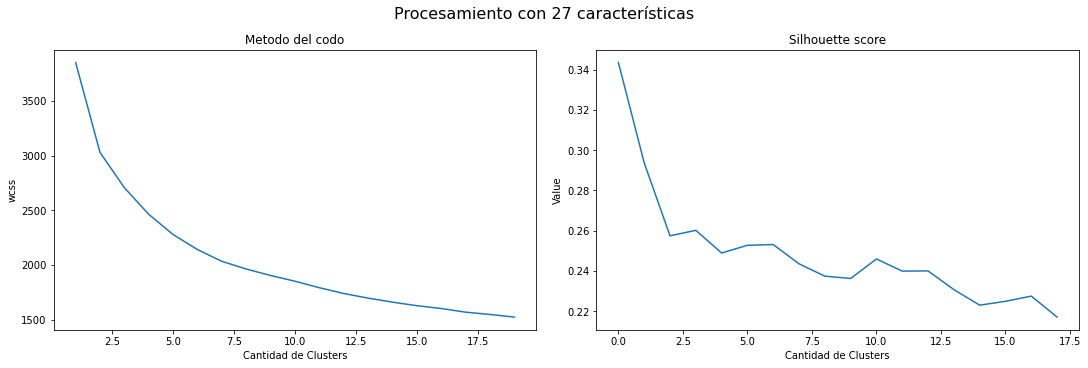

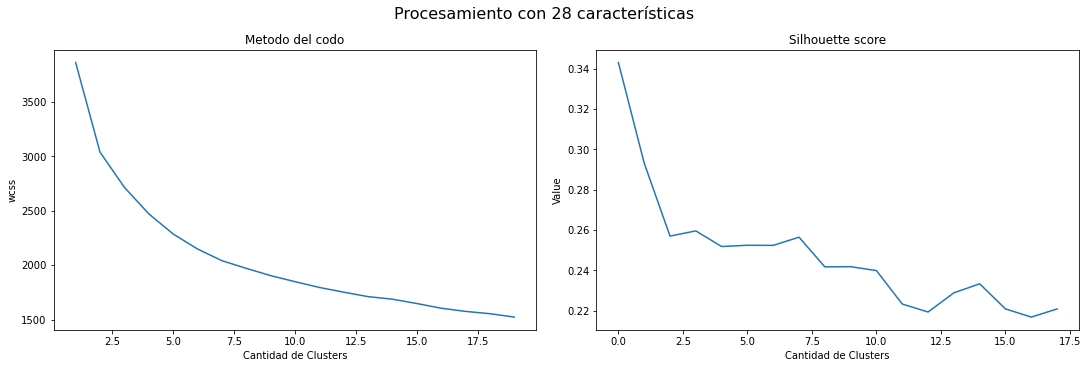

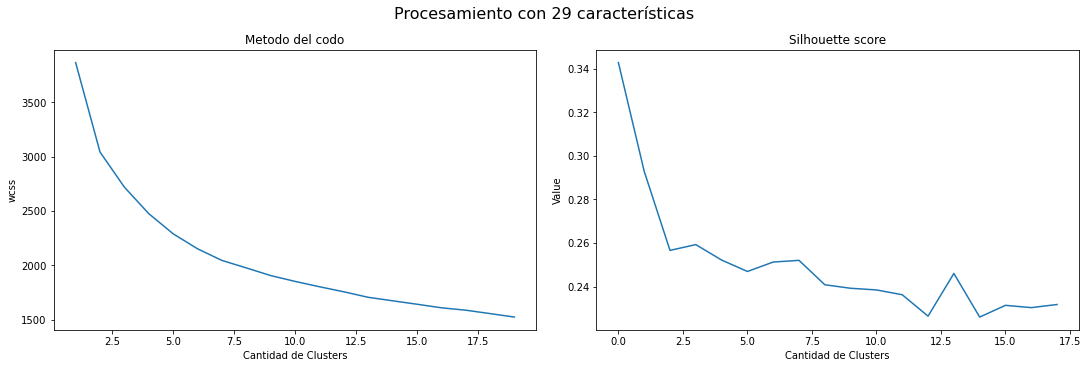

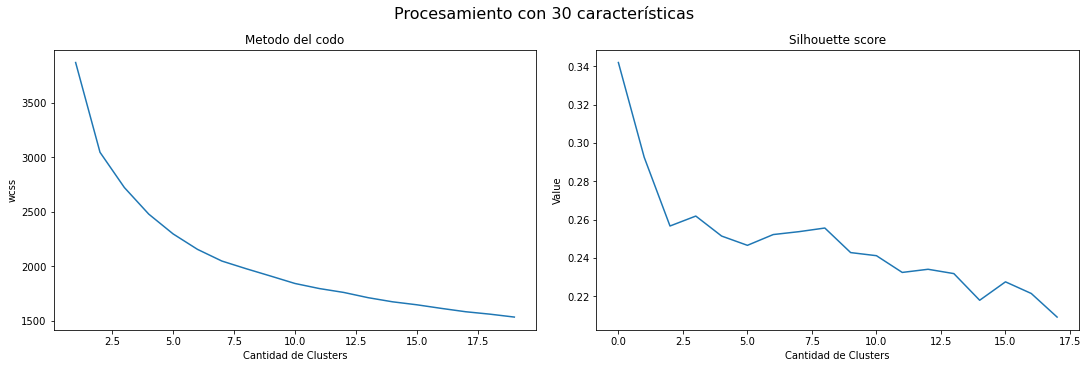

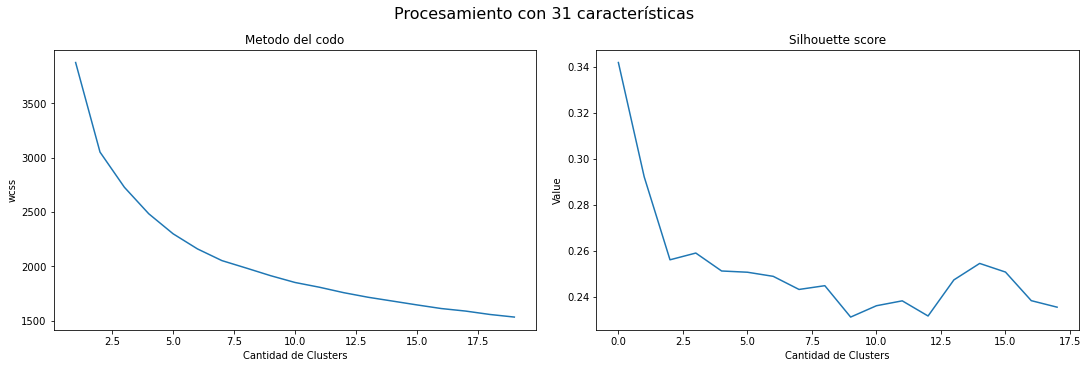

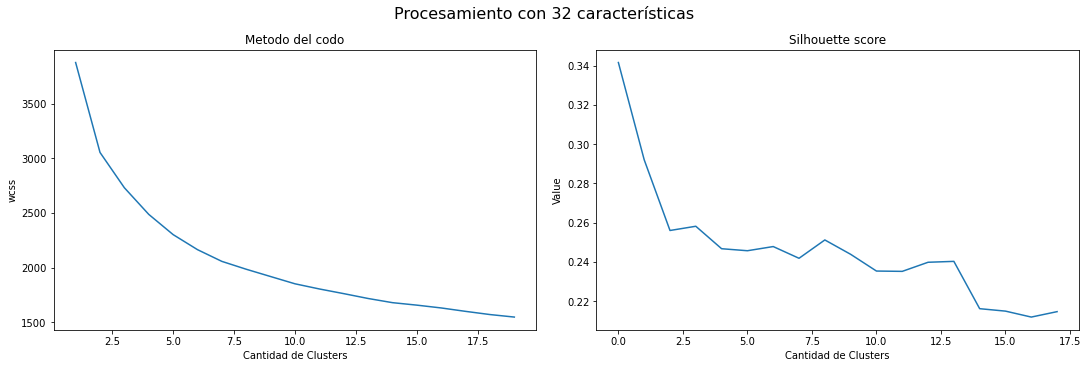

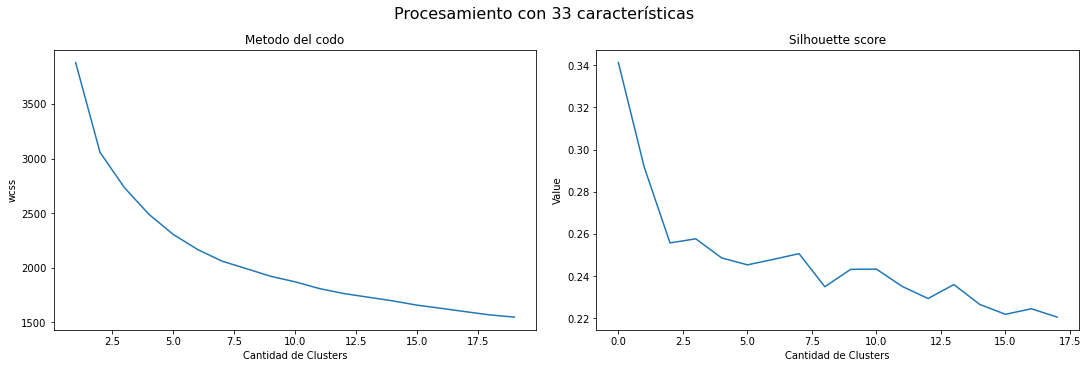

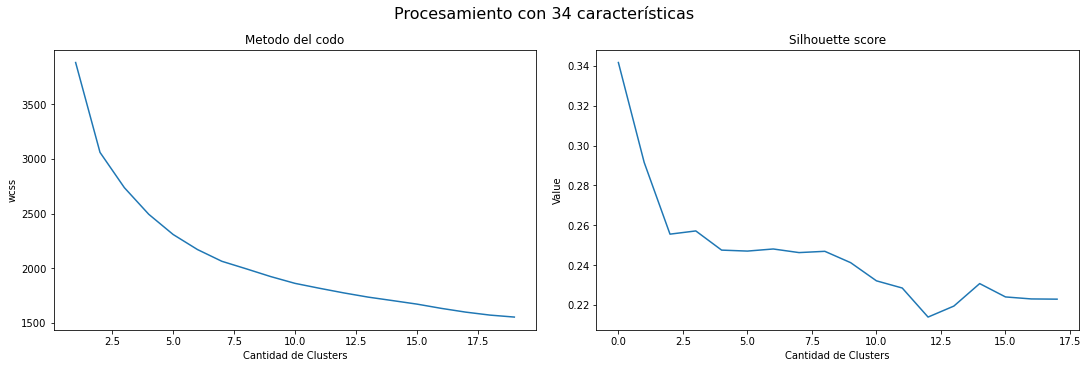

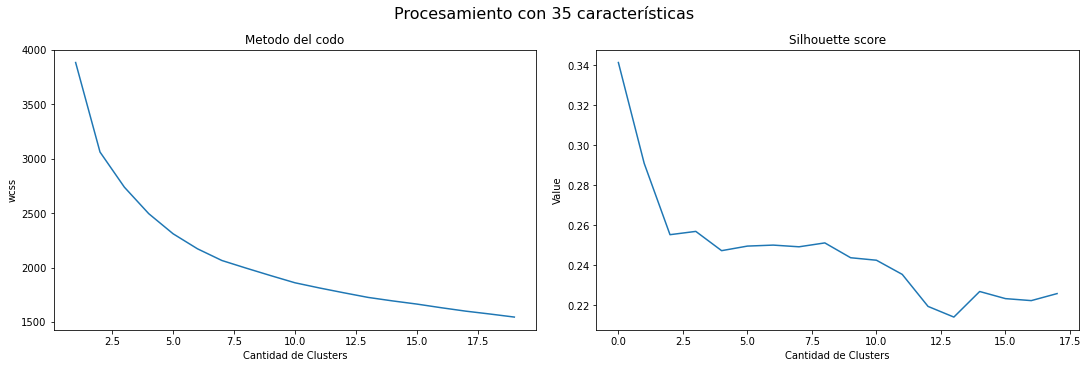

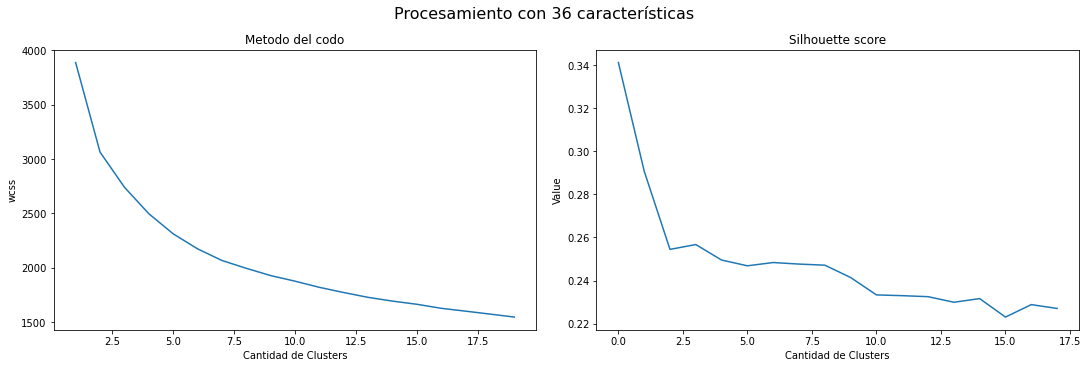

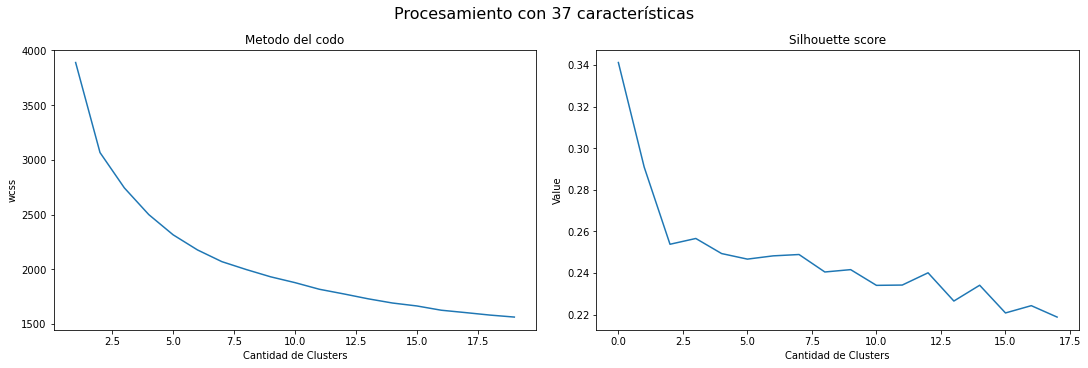

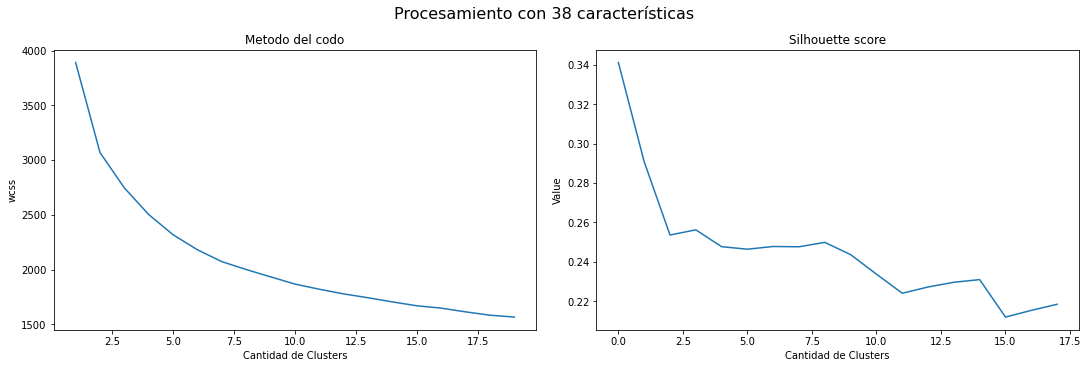

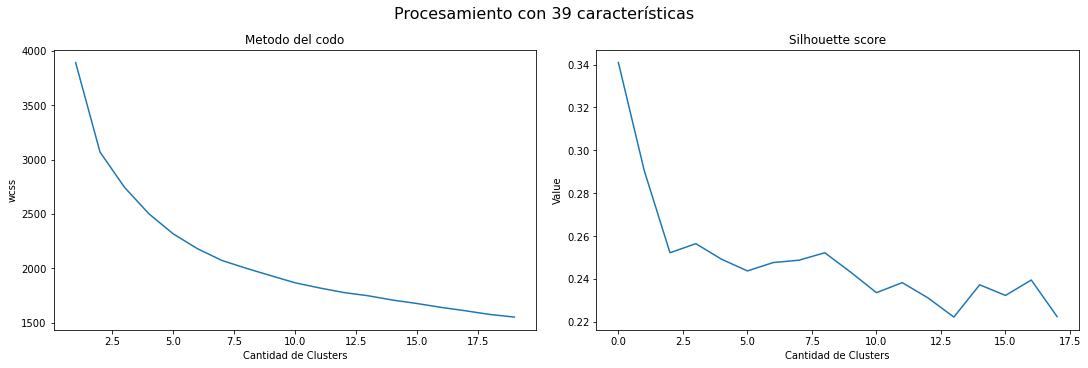

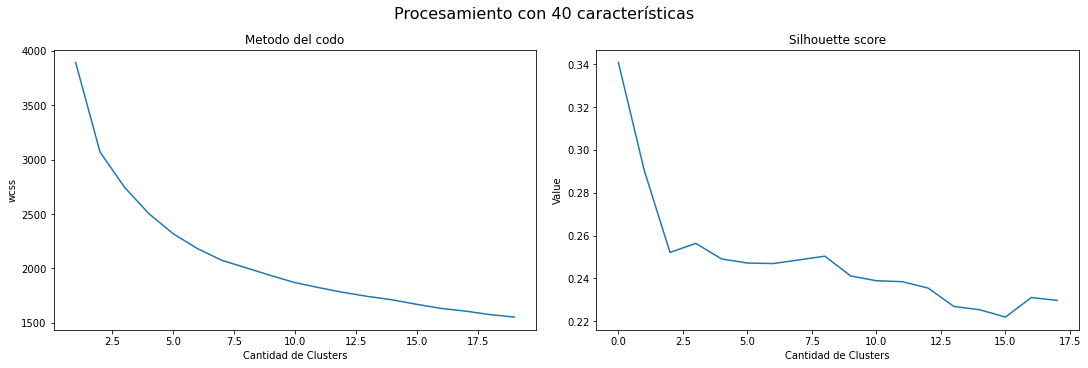

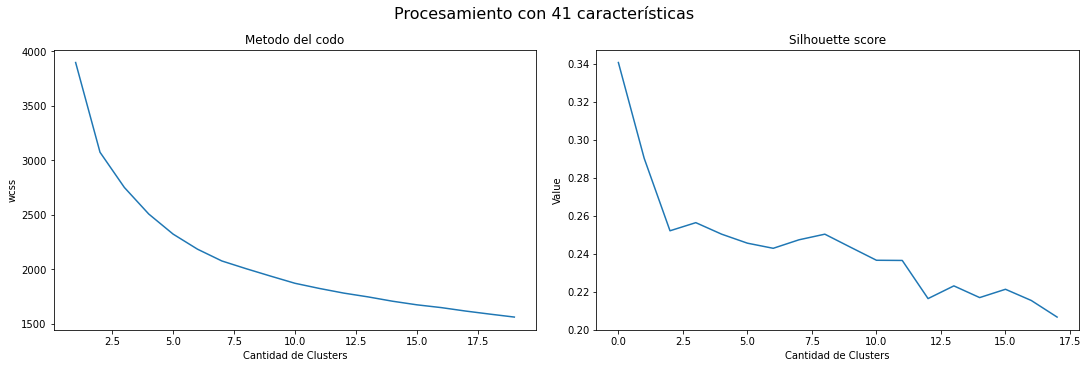

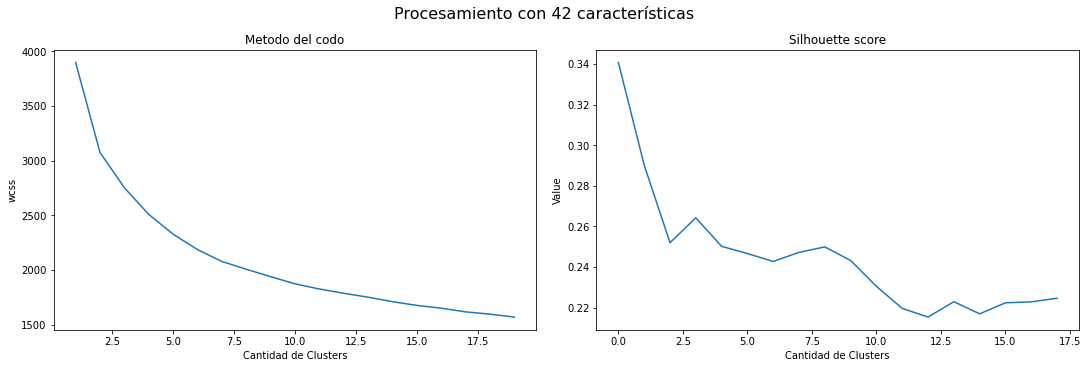

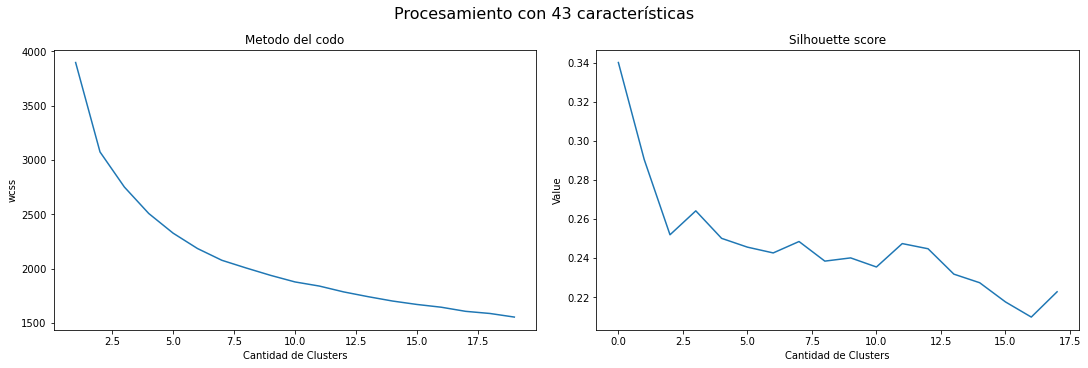

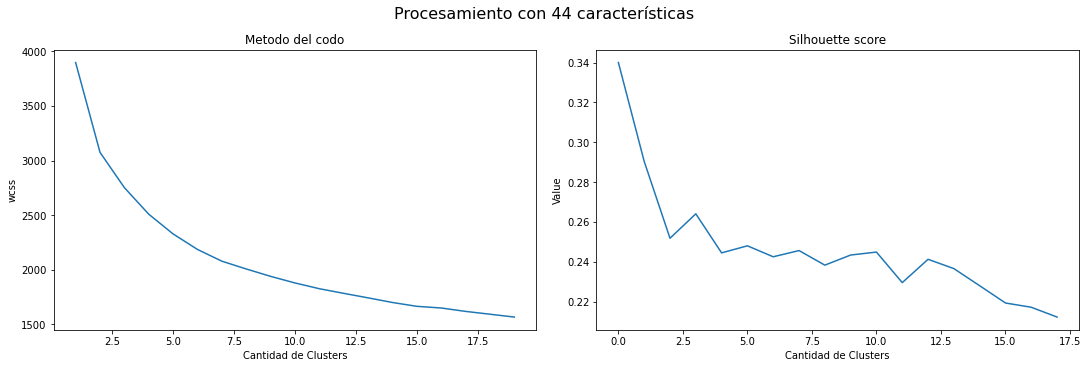

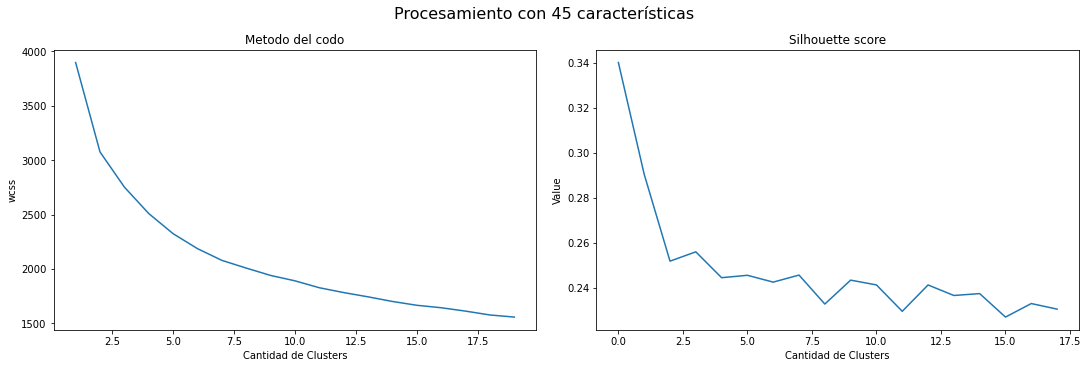

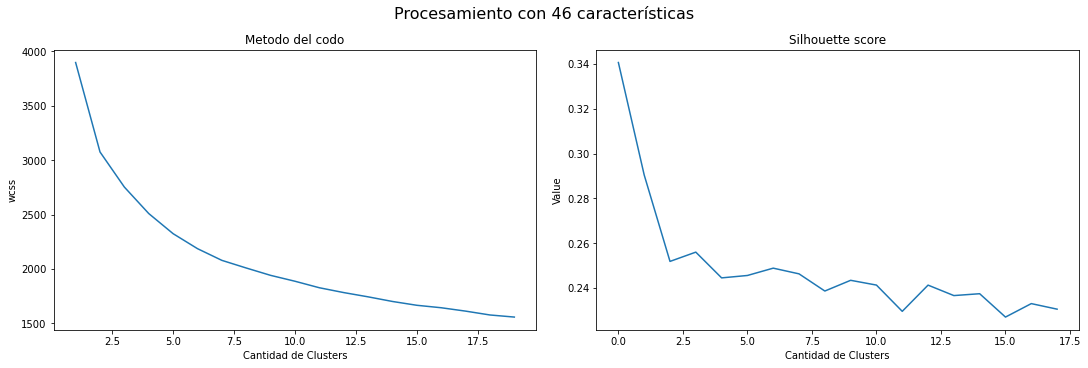

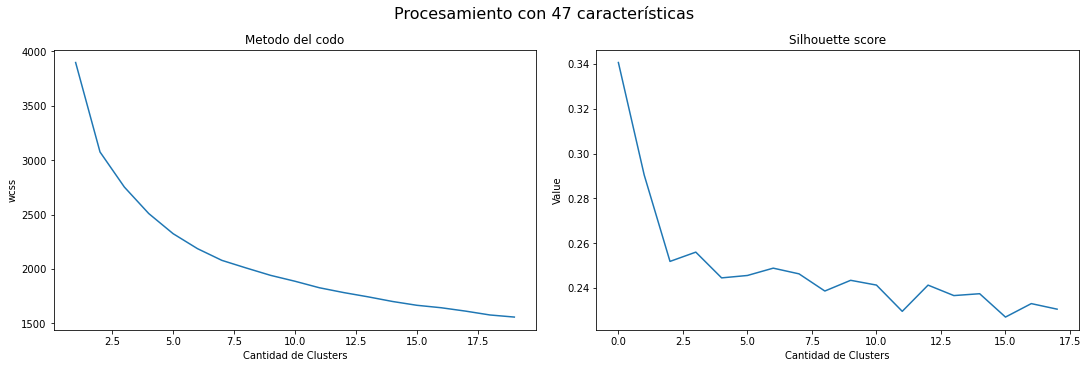

In [17]:
max_clusters = 20
wcss= []
columns_counts = len(data_frame.columns)
silhoutte_list = []
sample_silhouette_values_list = []
chs_list = []
dbs_list = []

for i in range(2, columns_counts):
    wcss= []
    silhoutte_list = []
    pca = PCA(n_components=i, copy=True)
    pca_x = pca.fit_transform(X)
    for j in range(1,max_clusters):
        kmeans = KMeans(n_clusters=j, init="k-means++",max_iter=300,n_init=10, random_state=0) #max_iter por default es 300
        kmeans.fit(pca_x)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        if(j>=2):
            silhoutte = silhouette_score(pca_x, labels, metric='sqeuclidean')
            silhoutte_list.append(silhoutte)
        wcss.append(kmeans.inertia_)
        
    fig1, axs1 = pyplot.subplots(1, 2, constrained_layout=True, figsize=(15,5))
    fig1.suptitle("Procesamiento con " + str(i) + " características", fontsize=16)
    axs1[0].set_title("Metodo del codo")
    axs1[0].plot(range(1,max_clusters),wcss)
    axs1[0].set_xlabel('Cantidad de Clusters')  # Add an x-label to the axes.
    axs1[0].set_ylabel('wcss')
    
    index = np.array(range(len(silhoutte_list)))
    
    axs1[1].set_title("Silhouette score")
    axs1[1].plot(index, np.array(silhoutte_list))
    axs1[1].set_xlabel('Cantidad de Clusters')
    axs1[1].set_ylabel('Value')
    
    pyplot.show()
        